# Cardiovascualr Disease Prediction

Kaggel: [dataset](https://www.kaggle.com/datasets/sulianova/cardiovascular-disease-dataset)

___

## [What are cardiovascular diseases?](https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds))
**Cardiovascular diseases (CVDs)** are a group of disorders of the heart and blood vessels. They include:

* *coronary heart disease* – a disease of the blood vessels supplying the heart muscle;

* *cerebrovascular disease* – a disease of the blood vessels supplying the brain;

* *peripheral arterial disease* – a disease of blood vessels supplying the arms and legs;

* *rheumatic heart disease* – damage to the heart muscle and heart valves from rheumatic fever, caused by streptococcal bacteria;

* *congenital heart disease* – birth defects that affect the normal development and functioning of the heart caused by malformations of the heart structure from birth; and

* *deep vein thrombosis and pulmonary embolism* – blood clots in the leg veins, which can dislodge and move to the heart and lungs.


Heart attacks and strokes are usually acute events and are mainly caused by a blockage that prevents blood from flowing to the heart or brain. The most common reason for this is a build-up of fatty deposits on the inner walls of the blood vessels that supply the heart or brain. Strokes can be caused by bleeding from a blood vessel in the brain or from blood clots.


#### Key facts:

* Cardiovascular diseases (CVDs) are the leading cause of death globally.

* An estimated 17.9 million people died from CVDs in 2019, representing 32% of all global deaths. Of these deaths, 85% were due to heart attack and stroke.

* Out of the 17 million premature deaths (under the age of 70) due to noncommunicable diseases in 2019, 38% were caused by CVDs.

* Most cardiovascular diseases can be prevented by addressing behavioural risk factors such as tobacco use, unhealthy diet and obesity, physical inactivity and harmful use of alcohol.

* It is important to detect cardiovascular disease as early as possible so that management with counselling and medicines can begin.


___

### Data description

There are 3 types of input features:

1. ***Objective***: factual information;

2. ***Examination***: results of medical examination;

3. ***Subjective***: information given by the patient.

___

### Features:

 * **Age** | Objective Feature | age | int \(days\)
 
 * **Height** | Objective Feature | height | int \(cm\) |

 * **Weight** | Objective Feature | weight | float \(kg\) |

 * **Gender** | Objective Feature | gender | categorical code |

 * **Systolic blood pressure** | Examination Feature | ap\_hi | int |

 * **Diastolic blood pressure** | Examination Feature | ap\_lo | int |

 * **Cholesterol** | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |

 * **Glucose** | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |

 * **Smoking** | Subjective Feature | smoke | binary |

 * **Alcohol intake** | Subjective Feature | alco | binary |

 * **Physical activity** | Subjective Feature | active | binary |

 * **Presence or absence of cardiovascular disease** | Target Variable | cardio | binary |

All of the dataset values were collected at the moment of medical examination.

___



___
## 1.Import liberies and dataset



In [67]:
# Basic Libraries

# Data analysis:
import numpy as np
import pandas as pd

# Visualization:
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
%matplotlib inline
sb.set() # set the default Seaborn style for graphics

In [68]:
cardiodata = pd.read_csv('cardio_train.csv',sep=';')
cardiodata.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [69]:
cardiodata.drop('id',axis=1,inplace=True)
cardiodata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [70]:
#Round up 'age' from days to years
cardiodata['age']= (cardiodata['age']//365)

In [71]:
cardiodata.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,47,1,156,56.0,100,60,1,1,0,0,0,0


In [72]:
cardiodata.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,52.840671,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,6.766774,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,29.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


### First expression of the data

* From the first glance of the data using `.describe()`, the category data seems is with in the range. 

* Howerever, in the numerical data, the **height**, **weight**, **ap_hi** and **ap_lo** seems have some abnormal data range out of the human limit.

* Lets go to the next step to filter out these abnormal data to have a cleaner dataset for training

___
## 2. Data Preprocessing


### Visualise summary of statistics using `.boxplot()` :

In [73]:
#get the numerical and category types of the headers
num=['age','height','weight','ap_hi','ap_lo']
cat=['gender','smoke',' cholesterol','gluc','alco','active']

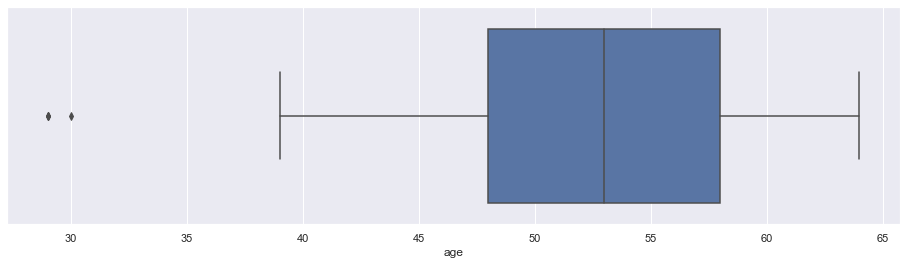

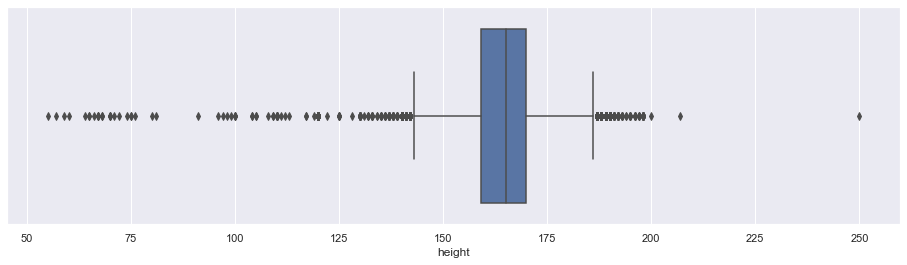

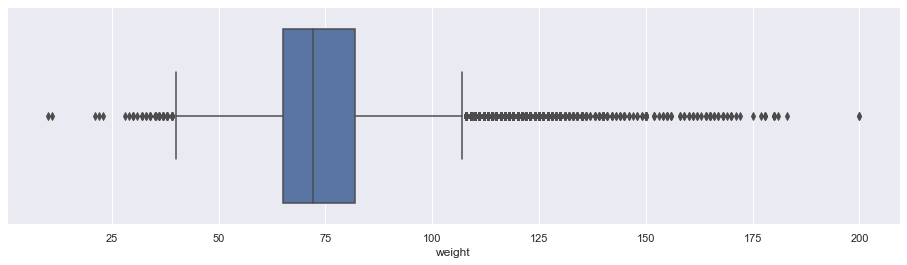

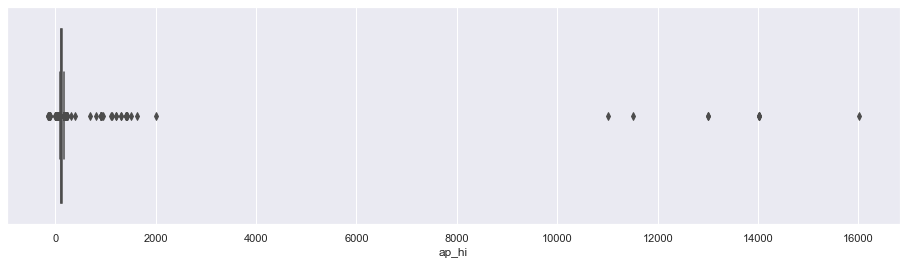

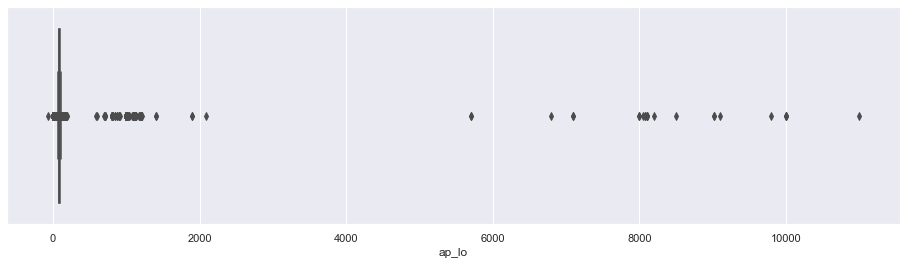

In [74]:
#box plot of the numerical data:
for var in num:
    fig, axes = plt.subplots(nrows=1, figsize=(16,4))
    sb.boxplot(data= cardiodata[num], x= var, orient='h')

### Research on Blood Pressure range

* **Systolic blood pressure** `ap_hi` – indicates how much pressure your blood is exerting against your artery walls when the heart beats.

* **Diastolic blood pressure** `ap_lo` – indicates how much pressure your blood is exerting against your artery walls while the heart is resting between beats.

Below is the Systolic and Diastolic blood pressure chart from *American Heart Association* suggesting the healthy and unhealthy range of the heart pressure.


- [American Herat Accosiation](https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings)

![Blood pressure chart](https://www.heart.org/-/media/Health-Topics-Images/HBP/blood-pressure-readings-chart-English.jpg )


As the max and min value of the `ap_lo` and `ap_hi` are clearly out of this suggested range. 

We will consider the `ap_hi` range in between **40 to 200** mm Hg, and `ap_lo` range in between **40 to 140** mm Hg

### Researching on the range of height and weight of human

* ###### Height range: 
	male **54.6** to **272** cm, female **30** to **246.3** cm

  * *ROBERT WADLOW* : 272cm [Guiness World Records of the tallest male ever](https://www.guinnessworldrecords.com/world-records/tallest-man-ever)

  * *ZENG JINLIAN* : 246.3 cm [Guiness World Records of the tallest female ever](https://www.guinnessworldrecords.com/world-records/tallest-woman)

  * *CHANDRA BAHADUR DANGI* : 54.6 cm [Guiness World Records of the shortest male ever](https://www.guinnessworldrecords.com/world-records/67521-shortest-man-ever)

  * *PAULINE MUSTERS* : 30cm [Guiness World Records of the shortest female ever](https://www.guinnessworldrecords.com/world-records/shortest-woman-ever)
  
* ###### Weight Range:
    * *Lucía Zaráte*: 2.9 kg [Lightest adult ever](https://en.wikipedia.org/wiki/Luc%C3%ADa_Z%C3%A1rate)
    
    * *Jon Brower Minnoch*: 635 kg [Heaviest adult ever](https://en.wikipedia.org/wiki/Jon_Brower_Minnoch)
   
	As shown in `cardiodata.describe()`: the range of weight in the dataset **10** to **200 kg** seems is still within this limit. Hence, we will not filter this `weight` data first.


### Limits set for the range

* Range of normal human blood pressure is: **40** to **200** ***mmHg*** for **ap_hi** and **40** to **140** ***mmHg*** **ap_lo**.

* Range of Height should not exit **30** to **247 cm**  for ***female***, and **54** to **272**  for ***male***

* From the max and min of weight, the weights are still in the acceptable range for human.

In [75]:
cardionew= cardiodata.copy()
ap_hi = cardionew['ap_hi']
ap_lo = cardionew['ap_lo']
weight = cardionew['weight']
height = cardionew['height']
gender= cardionew['gender']

___

In [76]:
#Print number of unusual

#ap_hi and ap_lo
numofap = cardionew['cardio'].loc[(ap_hi < 40) | (ap_hi > 200) | (ap_lo < 40) | (ap_lo > 140) | (ap_hi<=ap_lo)].count()
print("The number of ap_hi and ap_lo data that are outside the range of 40-370mmHg and ap_lo that are higher than ap_hi:",numofap)

#height for female
numofheight_female = cardionew['cardio'].loc[ (gender == 1) & ((height > 247) | (height < 30))].count()
print('The number height data that are outside range of 30-247cm for female:',numofheight_female)

#height for male
numofheight_male =cardionew['cardio'].loc[ (gender == 2) & ((height > 272) | (height < 54))].count()
print('The number height data that are outside range of 54-272cm for male:',numofheight_male)

The number of ap_hi and ap_lo data that are outside the range of 40-370mmHg and ap_lo that are higher than ap_hi: 1385
The number height data that are outside range of 30-247cm for female: 1
The number height data that are outside range of 54-272cm for male: 0


### Filter out the abnormal blood pressure, weight, height

In [77]:

#Filter out abnormal ap_hi and ap_low
cardionew = cardionew.drop(cardionew.loc[(ap_hi < 40) | (ap_lo <40) | (ap_hi> 200) | (ap_lo>140)].index)
cardionew = cardionew.drop(cardionew.loc[(ap_hi<=ap_lo)].index)

#Filter out abnormal height
cardionew = cardionew.drop(cardionew.loc[ (gender == 1) & ((height > 247) | (height < 30))].index )
cardionew = cardionew.drop(cardionew.loc[ (gender == 2) & ((height > 272) | (height < 54))].index )


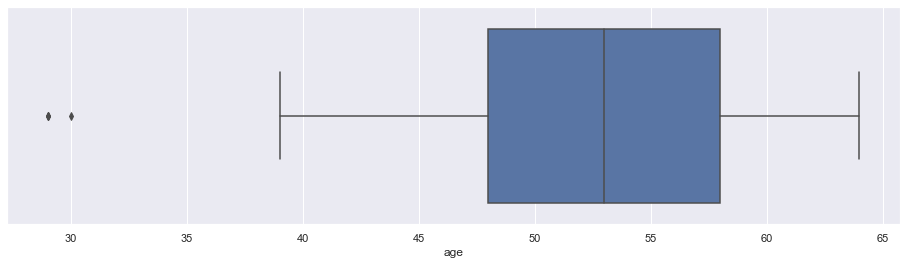

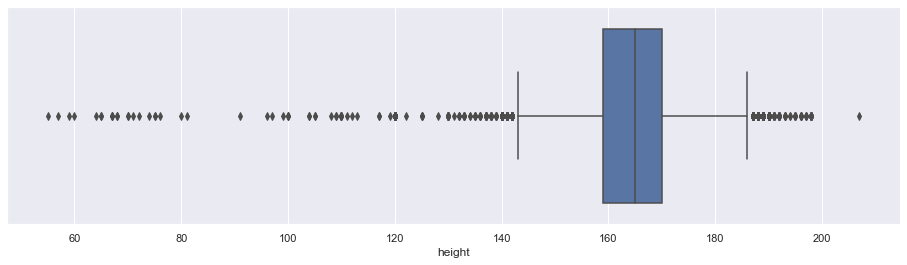

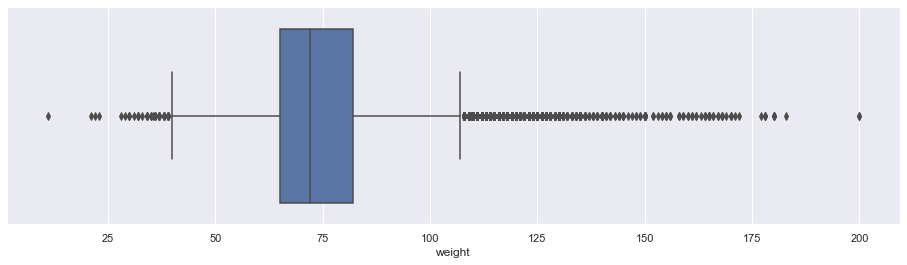

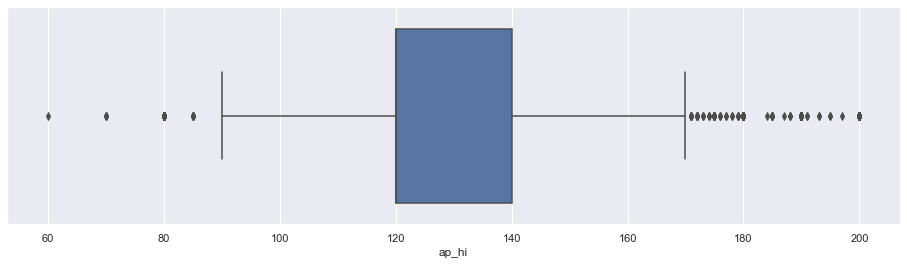

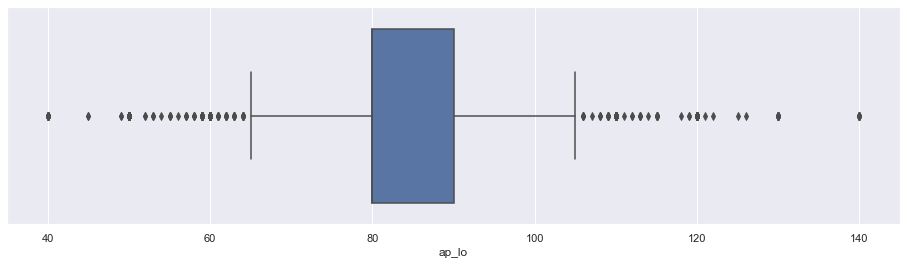

In [78]:
for var in cardionew[num]:
    fig, axes = plt.subplots(nrows=1, figsize=(16,4))
    sb.boxplot(data= cardionew, x= var, orient='h')

In [79]:
cardionew.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000,68614.000000
mean,52.826828,1.348486,164.357463,74.108425,126.599644,81.273312,1.364299,1.225581,0.087956,0.053342,0.803349,0.494447
std,6.770267,0.476494,8.176663,14.324818,16.497682,9.368070,0.678663,0.571482,0.283233,0.224716,0.397469,0.499973
min,29.000000,1.000000,55.000000,11.000000,60.000000,40.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,53.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,58.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,64.000000,2.000000,207.000000,200.000000,200.000000,140.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
cardionew.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68614 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          68614 non-null  int64  
 1   gender       68614 non-null  int64  
 2   height       68614 non-null  int64  
 3   weight       68614 non-null  float64
 4   ap_hi        68614 non-null  int64  
 5   ap_lo        68614 non-null  int64  
 6   cholesterol  68614 non-null  int64  
 7   gluc         68614 non-null  int64  
 8   smoke        68614 non-null  int64  
 9   alco         68614 non-null  int64  
 10  active       68614 non-null  int64  
 11  cardio       68614 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.8 MB


### Further filtering abnormal height and weight

#### Introduce in **BMI**
* Body mass index (BMI) is a person’s weight in kilograms divided by the square of height in meters. 

**BMI = Weight / (Height x Height)**

![BMI](https://www.healthhub.sg/sites/assets/Assets/In-Article%20Images%20(Small)/bmi_ranges.jpg)

Altough the `height` and `weight` are filtered to a acceptable range, there might be still out of acceptable range for one's BMI.


 * The range for [BMI](https://edinstitute.org/blog/2011/12/8/part-v-fat-no-more-fear-no-more-contempt#:~:text=The%20lowest%20BMI%20recorded%20was,Guinness%20World%20Book%20of%20Records%5D.) is **7.5** to **188** recorded

Hence, we add in `BMI` into the dataset and filter abnormal BMI

In [81]:
# created BMI=weight/height^2 to link weight and height
cardionew['BMI'] = cardionew['weight']/((cardionew['height']/100)*(cardionew['height']/100))
cardionew.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


In [82]:
cardionew['BMI'].describe()

count    68614.000000
mean        27.518964
std          6.050065
min          3.471784
25%         23.875115
50%         26.346494
75%         30.119376
max        298.666667
Name: BMI, dtype: float64

In [83]:
#BMI
BMI = cardionew['BMI']
numofBMI = cardionew['cardio'].loc[(BMI <7.5) | (BMI > 188)].count()
print('The number data that are outside BMI range of 7.5 to 188:', numofBMI)


The number data that are outside BMI range of 7.5 to 188: 7


In [84]:
#Filtering the BMI
cardionew = cardionew.drop(cardionew.loc[(BMI <7.5) | (BMI > 188)].index)

In [85]:
cardionew['BMI'].describe()

count    68607.000000
mean        27.503050
std          5.720730
min          8.001829
25%         23.875115
50%         26.346494
75%         30.119376
max        187.750077
Name: BMI, dtype: float64

Now the dataset is ready for exploration 

___
## 3.Exploratory Dataset

In [86]:
num=['age','height','weight','ap_hi','ap_lo','BMI']
cat=['gender','smoke','cholesterol','gluc','alco','active','cardio']

<AxesSubplot:>

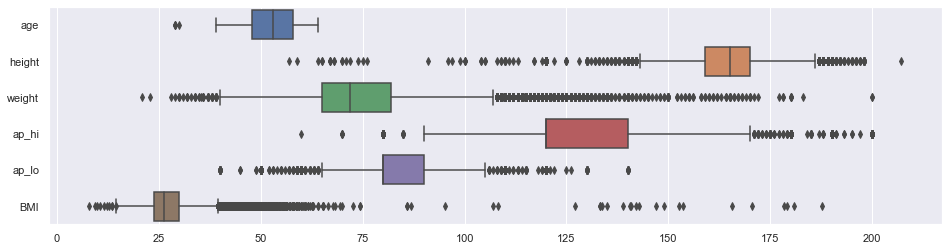

In [87]:
#box plot of the numerical data: (filtered data)
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,4))
sb.boxplot(data= cardionew[num], orient='h')

In [171]:
#Create a data frame for categorical data and change the dummy variables into words for easy understanding of the catplot later
cardioCat = cardionew.copy()

#Categorise  'gender' 1-women, 2-men
cardioCat['gender'].replace({1:'Female',2:'Male'},inplace=True)

#Categorise 'cholesterol' 1-normal, 2-above normal, 3- well above normal
cardioCat['cholesterol'].replace({1:'Normal',2:'Above Normal',3:'Well Above Normal'}, inplace=True)

#Categorise 'gluc' 1-normal, 2-above normal, 3- well above normal
cardioCat['gluc'].replace({1:'Normal',2:'Above Normal',3:'Well Above Normal'}, inplace=True)

#Categorise 'smoke' 0-No, 1-Yes
cardioCat['smoke'].replace({0:'No',1:'Yes'}, inplace=True)

#Categorise 'alco' 0-No, 1-Yes
cardioCat['alco'].replace({0:'No',1:'Yes'}, inplace=True)

#Categorise 'active' 0-No, 1-Yes
cardioCat['active'].replace({0:'No',1:'Yes'}, inplace=True)

#Categorise 'cardio' 0-No, 1-Yes
cardioCat['cardio'].replace({0:'No',1:'Yes'}, inplace=True)



#### Plotting catplot for the categorical data against `cardio`

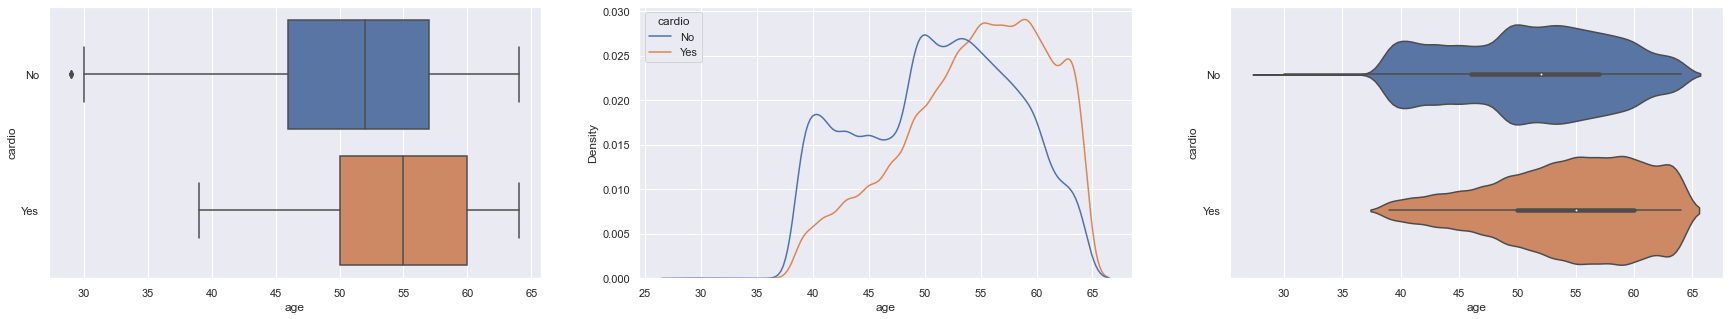

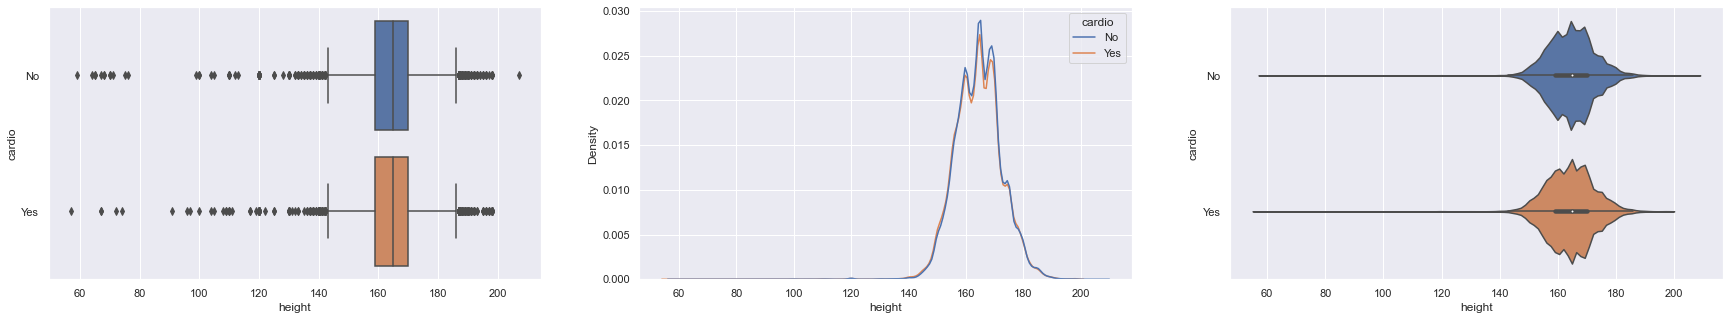

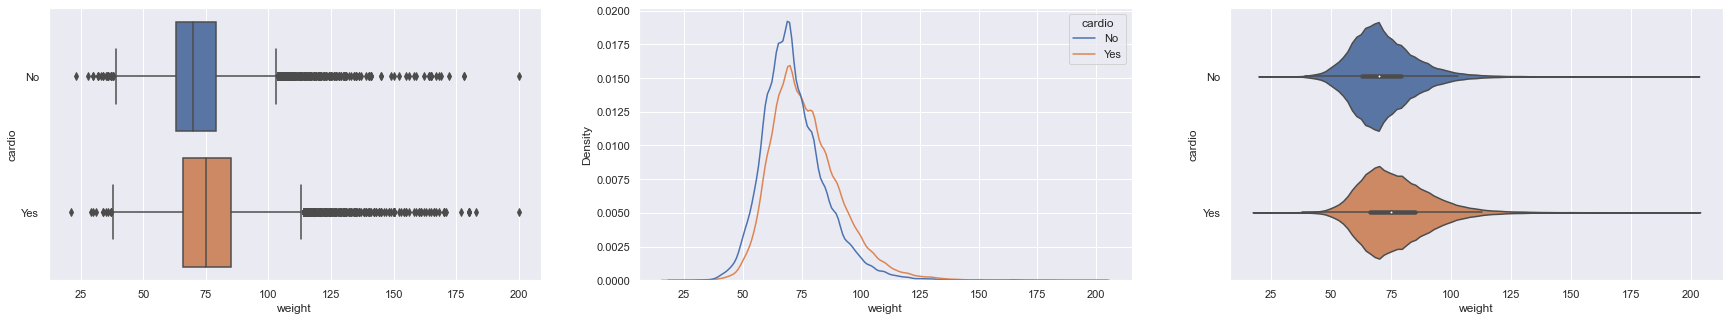

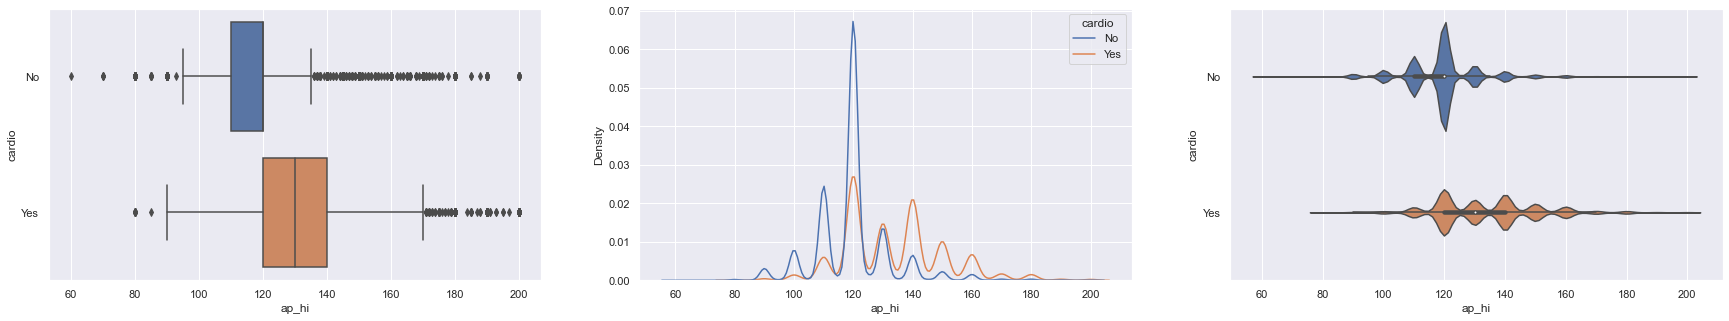

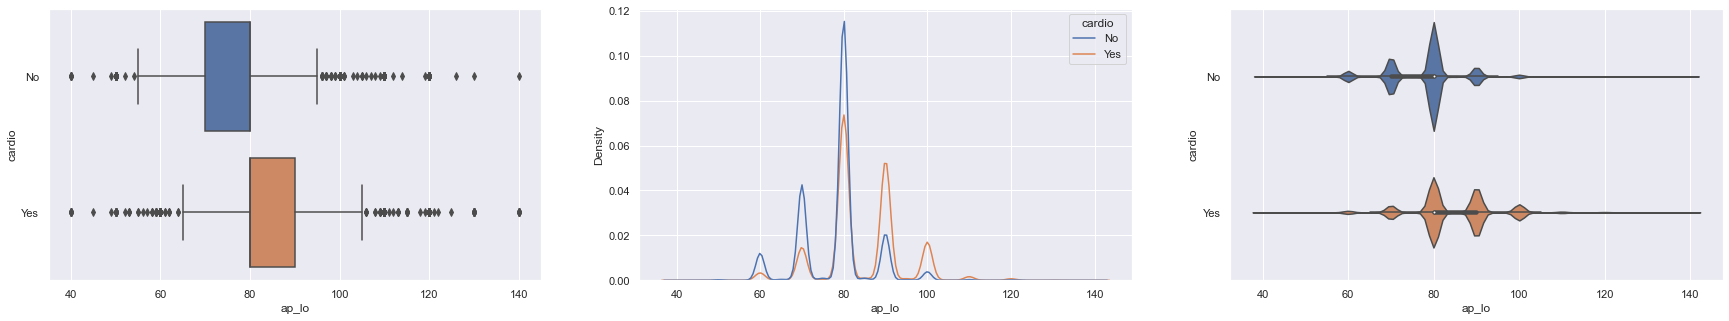

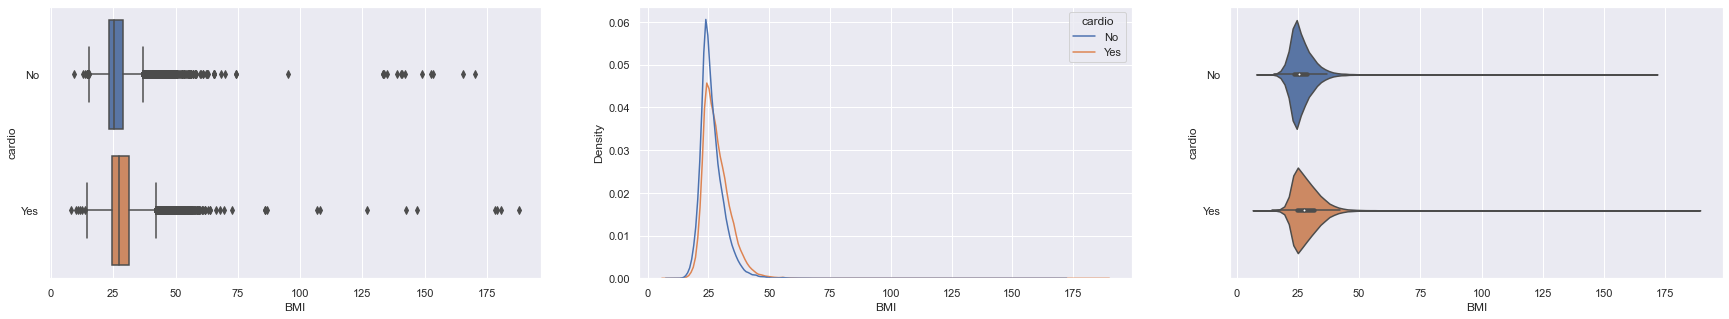

In [172]:
# Bivariate analysis with respective numerical data against 'cardio'
for var in num:                                                           
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30,5))                            
    sb.boxplot(data=cardioCat, x=var, y='cardio', orient='horizontal', ax=axes[0])          # box plot
    sb.kdeplot(data=cardioCat, x=var, hue='cardio', ax=axes[1])                             # kde plot
    sb.violinplot(data=cardioCat, x=var, y='cardio', orient='horizontal', ax=axes[2])   # violin plot

* It can be clearly seen that the box-plot distribution for high blood pressure `ap_hi` and low blood pressure `ap_lo` has a <ins>noticeable difference</ins> between those who have Cardio Vascular Disease and those who don't.


* In addtion, the box-plot distribution for `age` has also a <ins>slight difference</ins> for those who have Cardio Vascular Disease and those who don't.


* In contrast, the box-plot distributions of `height` and `weight` <ins>do not show the difference</ins> between those with Cardio Vascular Disease and those without, the distributions of Yes and No class almost overlap for both height and weight. However, `BMI` does has a <ins>slight difference</ins> for those who have Cardio Vascular Disease and those who don't.


* Therefore, this means that `ap_high`, `ap_lo` and `age` might be one of the few factors used to distinguish between Cardio Vascular Disease and Non-Cardio Vascular Disease patients while `height` and `weight` might unlikely to play an important role in predicting the target class.



### Distribution/Spread of Age against Cardio:

<AxesSubplot:xlabel='age', ylabel='count'>

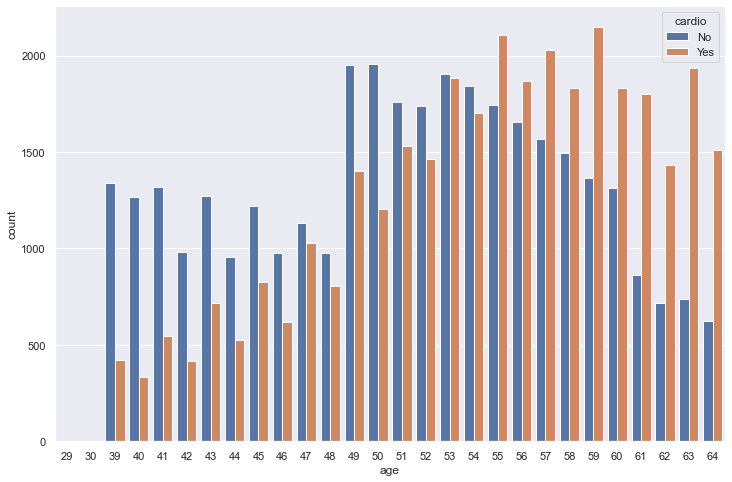

In [173]:
# Count plot of age over Cardio
fig = plt.subplots(figsize=(12,8))                # setup the fig frame of the plot
sb.countplot(x='age', hue='cardio', data=cardioCat)  # count plot

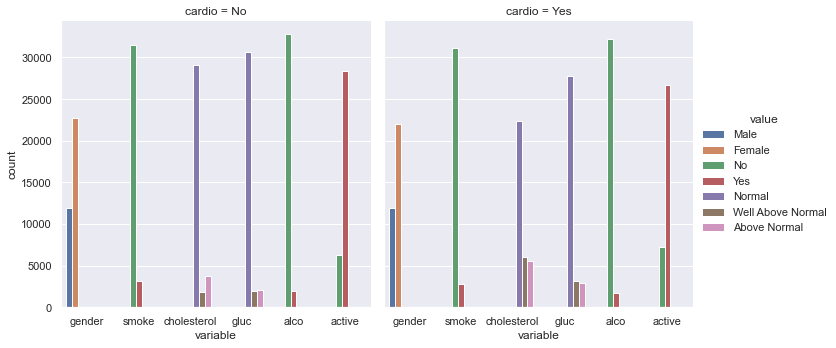

In [174]:
cat_df =pd.melt(cardioCat,id_vars=['cardio'], value_vars=cat)
sb.catplot(x='variable', hue='value', col='cardio', data=cat_df, kind='count')

## 4.Training of the dataset

### Splitting of the dataset into train and test

In [209]:
from sklearn.model_selection import train_test_split

# Extract Response and Predictors
y = pd.DataFrame(cardionew['cardio'])
X=cardionew.drop('cardio',axis=1)

# Split the Dataset into Train and Validation+Test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8,random_state=50)

print("Train Set :", X_train.shape, y_train.shape)
print("Test Set  :", X_test.shape, y_test.shape)


Train Set : (54885, 12) (54885, 1)
Test Set  : (13722, 12) (13722, 1)


### Training on Decision Tree model



In [210]:
#Decision Tree model (Yi Cheng/Yu Feng)

# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix


#### Tuning hyper parameters:


In [211]:
param_grid = {
    'max_depth': np.arange(1,100,10)
}

dectree= DecisionTreeClassifier(random_state=50)
GSearch = GridSearchCV(dectree, param_grid, cv=10)
GSearch.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'max_depth': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])})

In [214]:
GSearch.best_params_

{'max_depth': 11}

In [216]:
GSearch.best_score_

0.7216359966155477

In [222]:
param_grid = {
    'max_depth': np.arange(1,13)
}

dectree= DecisionTreeClassifier(random_state=50)
GSearch = GridSearchCV(dectree, param_grid, cv=10)
GSearch.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])})

In [223]:
GSearch.best_params_

{'max_depth': 5}

#### max_depth =5
___

In [226]:
param_grid = {
    'min_samples_leaf': np.arange(1,100,10)
}

dectree= DecisionTreeClassifier(random_state=50)
GSearch = GridSearchCV(dectree, param_grid, cv=10)
GSearch.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'min_samples_leaf': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])})

In [227]:
GSearch.best_params_

{'min_samples_leaf': 91}

In [228]:
GSearch.best_score_

0.7283410745424058

In [229]:
param_grid = {
    'min_samples_leaf': np.arange(85,95)
}

dectree= DecisionTreeClassifier(random_state=50)
GSearch = GridSearchCV(dectree, param_grid, cv=10)
GSearch.fit(X_train, y_train)


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=50),
             param_grid={'min_samples_leaf': array([85, 86, 87, 88, 89, 90, 91, 92, 93, 94])})

In [230]:
GSearch.best_params_

{'min_samples_leaf': 93}

In [231]:
GSearch.best_score_

0.7288694670018543

#### min_samples_leaf= 93
___

In [237]:
param_grid = {
    'min_samples_split': np.arange(2,100,10)
}

dectree= DecisionTreeClassifier(max_depth= 5, min_samples_leaf=93,random_state=50)
GSearch = GridSearchCV(dectree, param_grid, cv=10)
GSearch.fit(X_train, y_train)


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=93,
                                              random_state=50),
             param_grid={'min_samples_split': array([ 2, 12, 22, 32, 42, 52, 62, 72, 82, 92])})

In [238]:
GSearch.best_params_

{'min_samples_split': 2}

In [239]:
GSearch.best_score_

0.7317117338307678

___

In [242]:
param_grid = {
    'max_features': np.arange(3,10)
}

dectree= DecisionTreeClassifier(max_depth= 5, min_samples_leaf=93,random_state=50)
GSearch = GridSearchCV(dectree, param_grid, cv=10)
GSearch.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=5, min_samples_leaf=93,
                                              random_state=50),
             param_grid={'max_features': array([3, 4, 5, 6, 7, 8, 9])})

In [243]:
GSearch.best_params_

{'max_features': 8}

In [244]:
GSearch.best_score_

0.7262639080174662

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.7259178281862075

Goodness of Fit of Model 	Validation Dataset
Classification Accuracy 	: 0.7224894330272555



<AxesSubplot:>

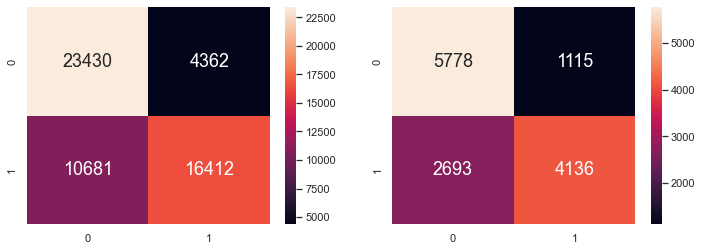

In [245]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=93,max_features=8)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Validation Data)
print("Goodness of Fit of Model \tValidation Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Validation
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


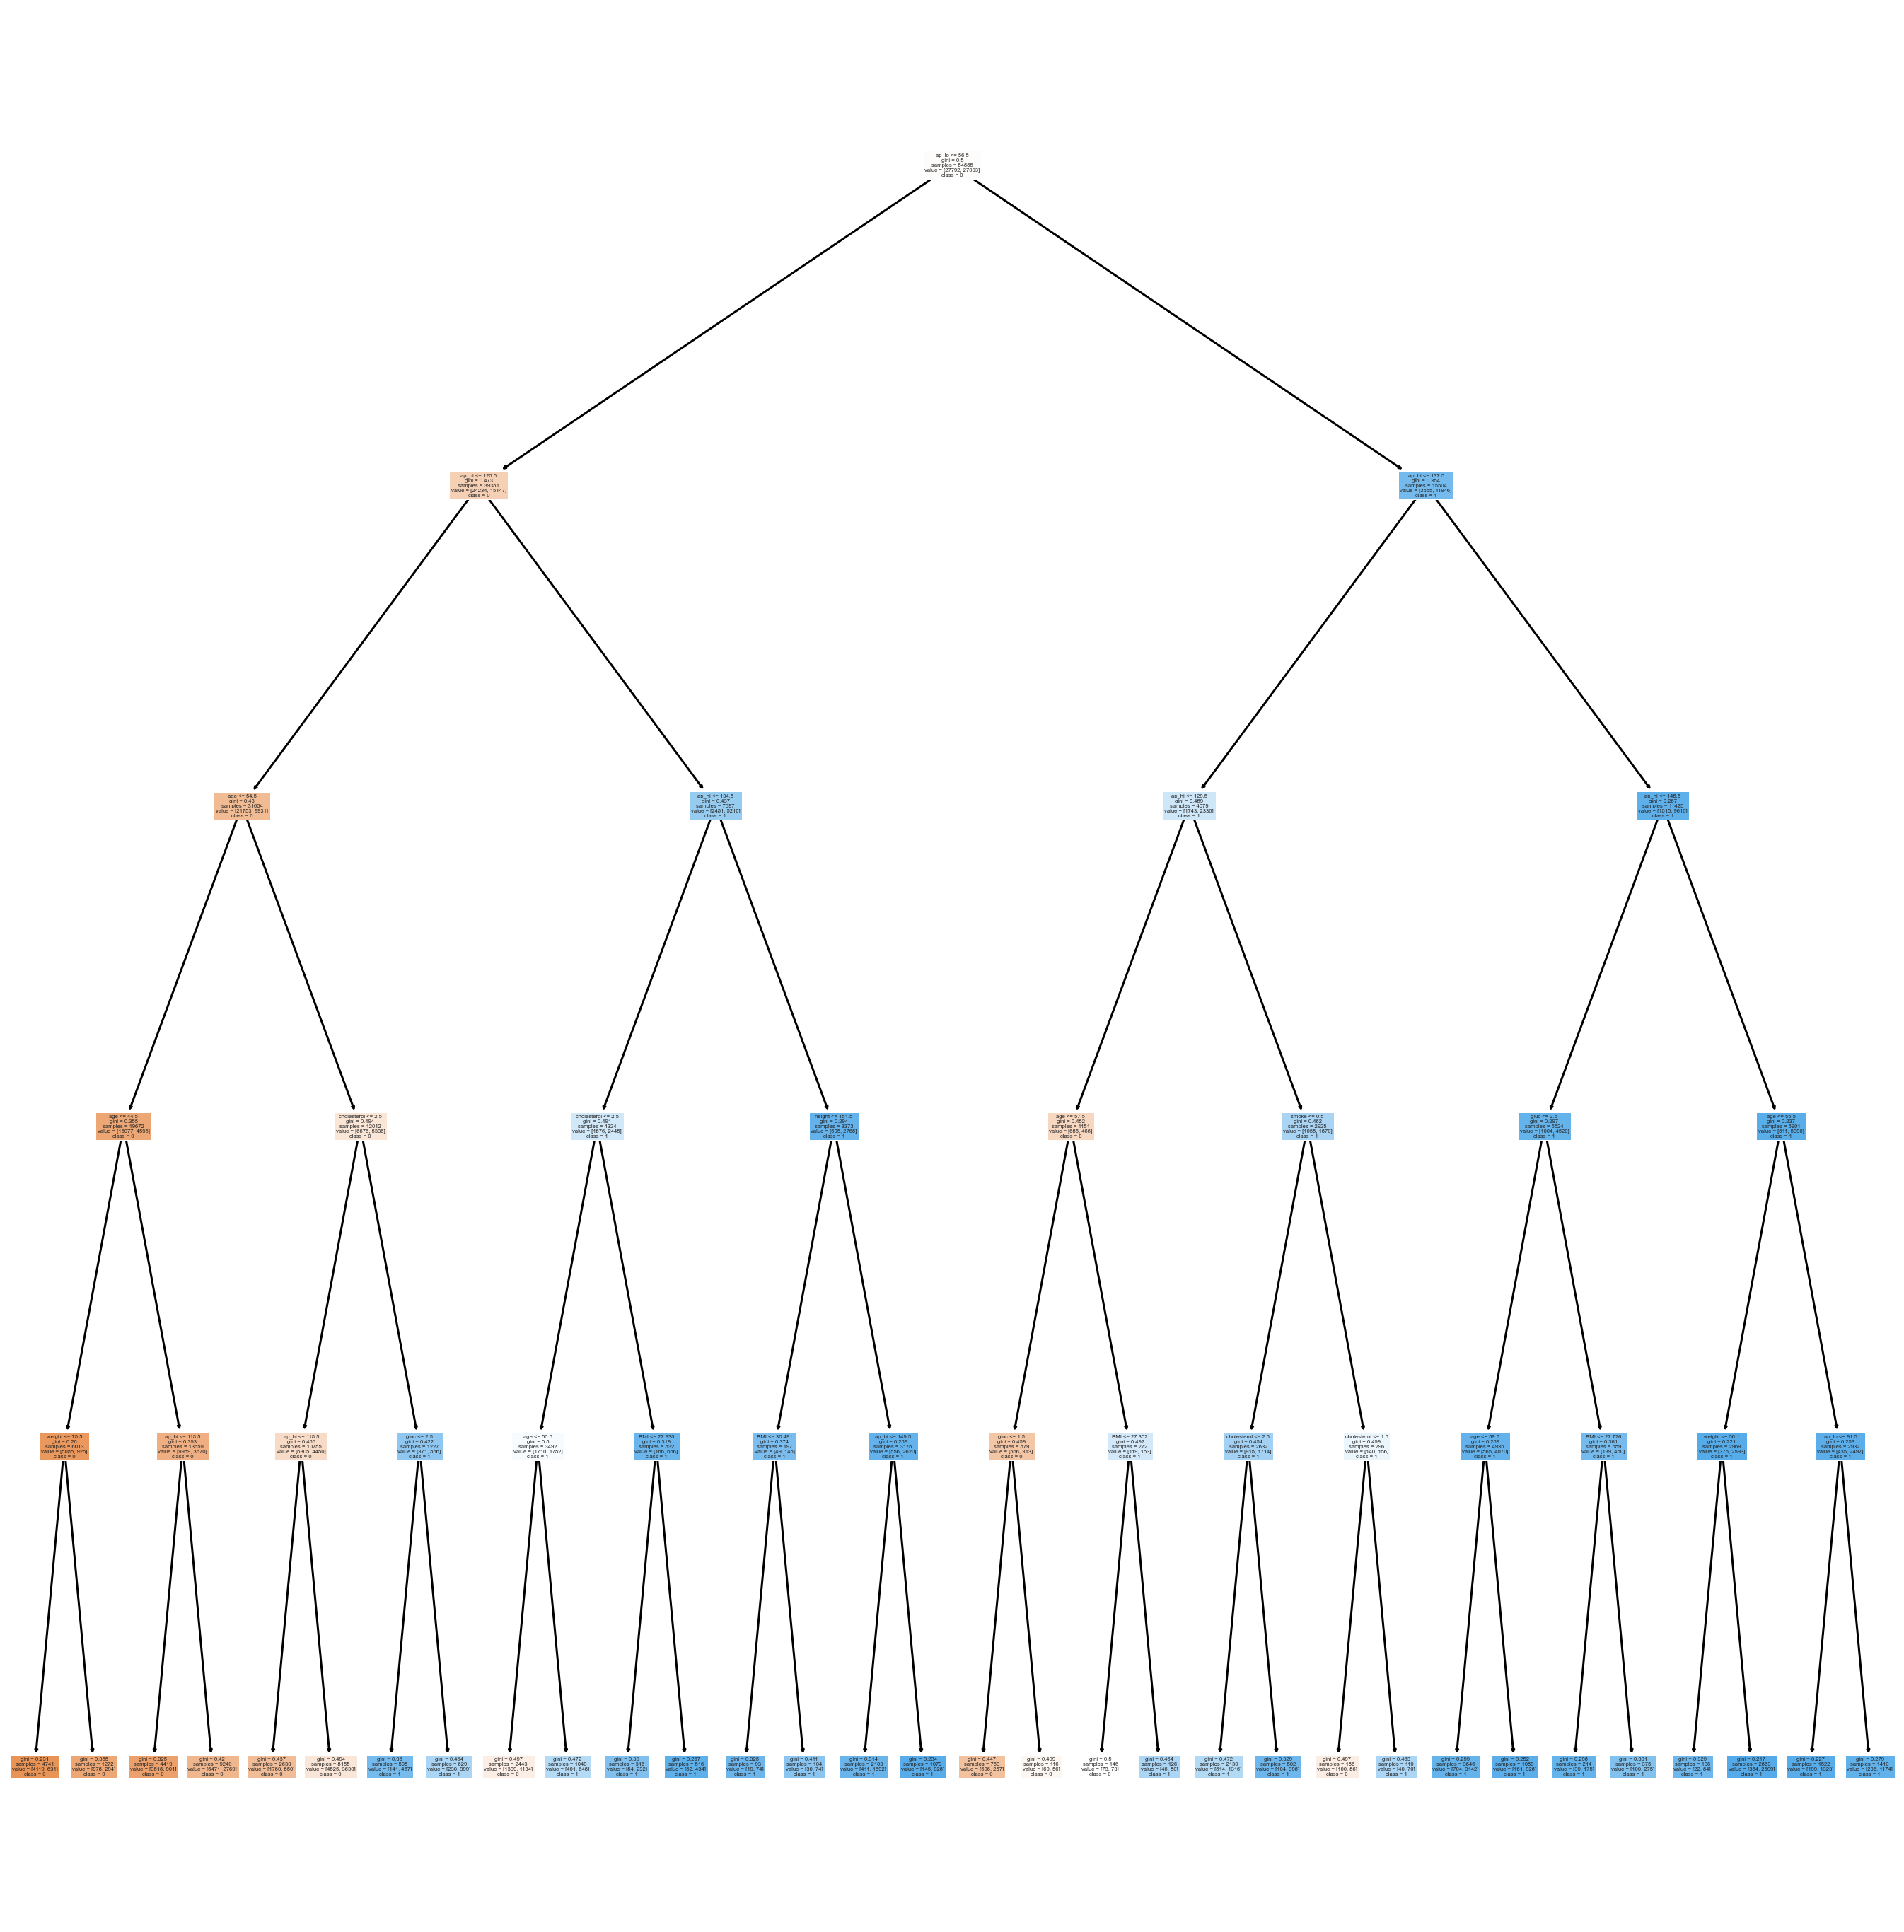

In [246]:
# Plot the Decision Tree validation
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(48, 50))
out = plot_tree(dectree, 
          feature_names = X_test.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)

plt.show()

___

## Training on Random Forest model
by Dai Yang Zhi and Tan Ming Tah

### Ensemble learning

* The **goal** of ensemble methods is to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

    * **Types** of ensemble learning:
        * **Bagging**: 
            * the short form for bootstrap aggregating, is mainly applied in classification and regression. 
            * It increases the accuracy of models through decision trees, which reduces variance to a large extent. 
            * The reduction of variance increases accuracy, eliminating overfitting, which is a challenge to many predictive models.
        * **Boosting**:
            * Boosting is an ensemble technique that learns from previous predictor mistakes to make better predictions in the future. 
            * The technique combines several weak base learners to form one strong learner, thus significantly improving the predictability of models. 
            * Boosting works by arranging weak learners in a sequence, such that weak learners learn from the next learner in the sequence to create better predictive models.
        * **Stacking**:
            * Stacking, another ensemble method, is often referred to as stacked generalization. 
            * This technique works by allowing a training algorithm to ensemble several other similar learning algorithm predictions.


### Random Forest model
* Random Forest is the bagging ensemle learning methods

* The bias of the full model is equivalent to the bias of a single decision tree (which itself has high variance).

* By creating many of these trees, in effect a "forest", and then averaging trees the variance of the final model can be greatly reduced over that of a single tree.

* Hence, Random Forest model has relatively **lower variance** and **low bias** than Decision Tree
    
    

<ins>Over- and Under-fitting of the model</ins>

* As the **complexity** of the model increases, the model will be decreased in **bias** and increased in **variance**
    

 *Low Variance*: Suggests small changes to the estimate of the target function with changes to the training dataset.

 *High Variance*: Suggests large changes to the estimate of the target function with changes to the training dataset.


 *Low Bias*: Suggests less assumptions about the form of the target function.

 *High-Bias*: Suggests more assumptions about the form of the target function.

![Bias and variance contributing to total error](https://upload.wikimedia.org/wikipedia/commons/9/9f/Bias_and_variance_contributing_to_total_error.svg)

In [95]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

#### Use of cross-validation

* Cross-validation or ‘k-fold cross-validation’ is when the dataset is randomly split up into ‘k’ groups. 

* One of the groups is used as the test set and the rest are used as the training set. 

* The model is trained on the training set and scored on the test set. 

* Then the process is repeated until each unique group as been used as the test set.

    **Advantage**
    
    It provides model the opportunity to train on multiple train-test splits. This gives a better indication of how well the model will perform on unseen data.

![k-fold CV](https://miro.medium.com/max/1400/1*AAwIlHM8TpAVe4l2FihNUQ.png)

In [30]:
#check the accurary of the dataset on the randomforest model
rfc =RandomForestClassifier(random_state=50)
score_pre = cross_val_score(rfc,X_train,y_train.values.flatten(), cv=10).mean()

In [31]:
print('Accuracy of the default model:',score_pre)

Accuracy of the default model: 0.7105402761526234


#### Hyper parameters for Random Forest

* `n_estimators`: number of trees in the forest, **Increase** model complexity


* `max_depth`: maximum depth of the tree, **Decrease** model complexity


* `max_leaf_nodes`: Grow trees with max_leaf_nodes in best-first fashion, **Decrease** model complexity


* `criterion`: {“gini”, “entropy”}


* `min_samples_split`: minimum number of samples required to split an internal node, **Decrease** model complexity


* `min_samples_leaf`: minimum number of samples required to be at a leaf node, **Decrease** model complexity


* `max_features`:  number of features to consider when looking for the best split, might **Increase** or **Decrease** model complexity depends on setting


#### Tuning `n_estimators`

The model has higher complexity with `n_estimators` by default

By tuning this parameter, it will increase the complexity of the model.

In [32]:
#plot learning curve for n_estimators in RF
scoreboard=[]

for i in range(0,301,50):
    rfc = RandomForestClassifier(n_estimators=i+1, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard.append(score)

print(max(scoreboard), (scoreboard.index(max(scoreboard))*50)+1 )


0.7119615191156232 251


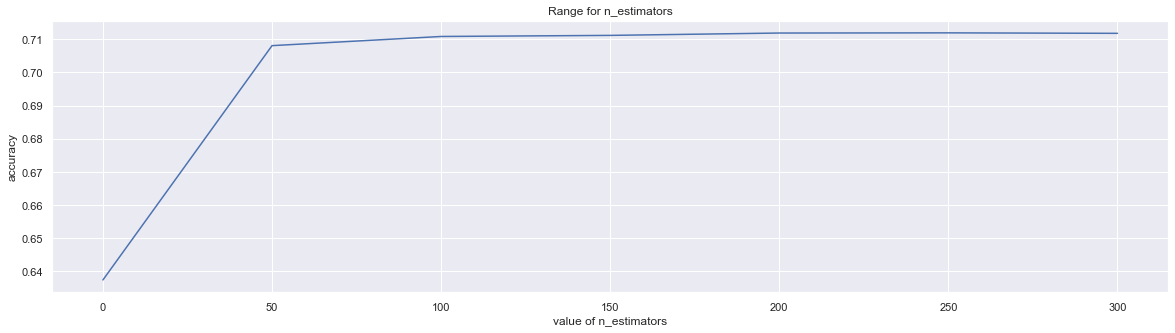

In [33]:
plt.figure(figsize=[20,5])
plt.plot(range(0,301,50),scoreboard)
plt.title('Range for n_estimators')
plt.xlabel('value of n_estimators')
plt.ylabel('accuracy')
plt.show()

#### Set a rough range for the `n_estimators`  

* from the learning curve above, the accuracy increase linearly when `n_estimators` is less than around 10, and slowly saturated till 200 with small oscillating.

* We can see that the peak accuracy of the model for the overall dataset is around `n_estimators` .
  

#### Decrease the range of `n_estimators` further 


In [34]:
param_n_estimators= (scoreboard.index(max(scoreboard))*50)+1

In [35]:
print(param_n_estimators)

251


In [36]:
#plot learning curve for n_estimators in RF
scoreboard2=[]
for i in range(param_n_estimators-5,param_n_estimators+5,1):
    rfc = RandomForestClassifier(n_estimators=i, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard2.append(score)

#update param_n_estimators    
param_n_estimators= (scoreboard2.index(max(scoreboard2))+(param_n_estimators-5))

In [37]:
print('n_estimators:',param_n_estimators, '\nAccuracy after adjust n_estimators:',max(scoreboard2), '\nAccuracy gain after adjust n_estimators:',max(scoreboard2)-score_pre)

n_estimators: 254 
Accuracy after adjust n_estimators: 0.7120161937976139 
Accuracy gain after adjust n_estimators: 0.0014759176449905542


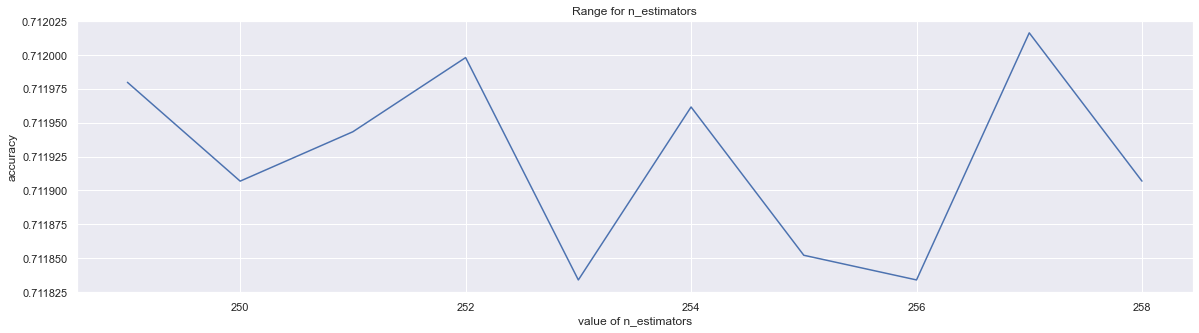

In [38]:
plt.figure(figsize=[20,5])
plt.plot(range(param_n_estimators-5,param_n_estimators+5,1),scoreboard2)
plt.title('Range for n_estimators')
plt.xlabel('value of n_estimators')
plt.ylabel('accuracy')
plt.show()

Confirm the value set for `n_estimators` to be **254** at the highest accuracy

In [39]:
accuracy_n_estimators= max(scoreboard2)
print(param_n_estimators)

254


#### Next to adjust the `max_depth`

The model has higher complexity with `max_depth` by default

By tuning this parameter, it will decrease the complexity of the model.

In [40]:
#setting for max_depth
#plot learning curve for max_depth in RF

scoreboard_depth=[]

for i in range(1,50,5):
    rfc = RandomForestClassifier(max_depth=i,n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard_depth.append(score)

param_max_depth = (scoreboard_depth.index(max(scoreboard_depth))*5)+1

In [41]:
print('highest accuracy:',max(scoreboard_depth), 'at max_depth=',param_max_depth )

highest accuracy: 0.7337524074122271 at max_depth= 11


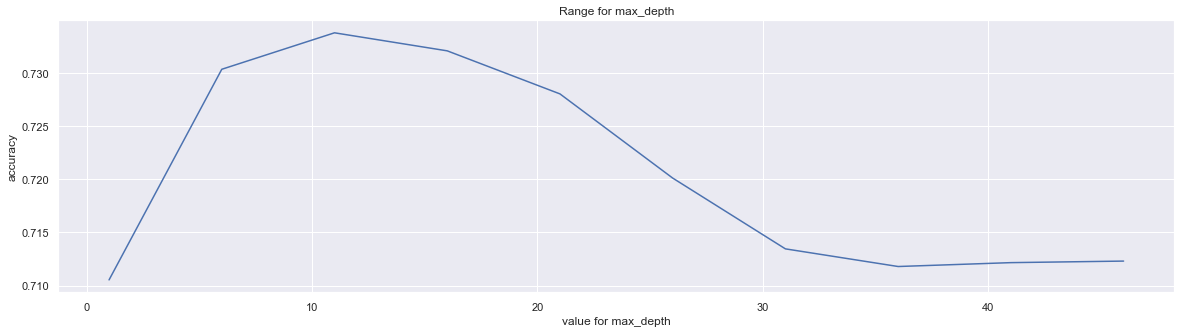

In [42]:
plt.figure(figsize=[20,5])
plt.plot(range(1,50,5),scoreboard_depth)
plt.title('Range for max_depth')
plt.xlabel('value for max_depth')
plt.ylabel('accuracy')
plt.show()

#### Set the range futher in detail

From the learning curve of the max_depth above we can see that the accuracy increases until **11** and then decreases after it.
Hence, the max_depth seems to be at around **11**

In [43]:
#using gridsearch for max_depth to futher down scale the range

param_grid = {'max_depth':np.arange(param_max_depth-3 ,param_max_depth+3)}

rfc= RandomForestClassifier(n_estimators= param_n_estimators, random_state=50, n_jobs=-1)

GSearch = GridSearchCV(rfc, param_grid, cv=10)
GSearch.fit(X_train, y_train.values.flatten())

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=254, n_jobs=-1,
                                              random_state=50),
             param_grid={'max_depth': array([ 8,  9, 10, 11, 12, 13])})

In [44]:
GSearch.best_params_

{'max_depth': 10}

In [45]:
accuracy_max_depth = GSearch.best_score_
print(accuracy_max_depth)

0.7339892878786994


In [46]:
print( 'Accuracy after adjust max_depth:',GSearch.best_score_,'\nAccuracy gain after adjust max_depth:',GSearch.best_score_ - accuracy_n_estimators)

Accuracy after adjust max_depth: 0.7339892878786994 
Accuracy gain after adjust max_depth: 0.021973094081085498


As the accuracy has increase after tuning the parameter for max_depth , we now will confirm the final value for max_depth is **10**

In [47]:
#update the final value for max_depth
param_max_depth =GSearch.best_params_.get('max_depth')

In [48]:
#current parameters found on n_estimators and max_depth
print(param_n_estimators, param_max_depth)

254 10


#### Next tuning of the `max_leaf_nodes`


In [49]:
#setting for max_leaf_nodes
#plot learning curve for max_leaf_nodes in RF

scoreboard_nodes=[]

for i in range(50,1050,100):
    rfc = RandomForestClassifier(max_leaf_nodes=i ,max_depth= param_max_depth, n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard_nodes.append(score)
    
param_max_leaf_nodes = (scoreboard_nodes.index(max(scoreboard_nodes))*100)+50 

In [50]:
print('highest accuracy:',max(scoreboard_nodes), 'at max_leaf_nodes=',param_max_leaf_nodes )

highest accuracy: 0.7345176537809253 at max_leaf_nodes= 250


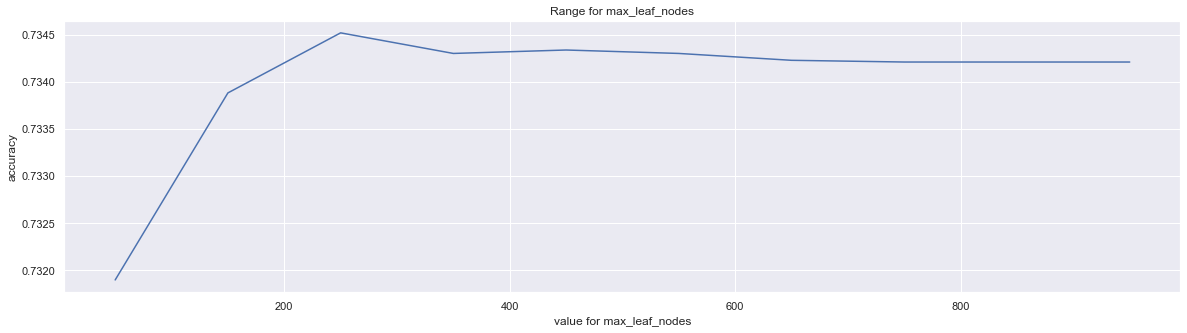

In [51]:
plt.figure(figsize=[20,5])
plt.plot(range(50,1050,100),scoreboard_nodes)
plt.title('Range for max_leaf_nodes')
plt.xlabel('value for max_leaf_nodes')
plt.ylabel('accuracy')
plt.show()

#### Fine tuning of max_leaf_nodes
As the accuracy increases, we will continue to fine tune this parameter

In [52]:
#setting for max_leaf_nodes
#plot learning curve for max_leaf_nodes in RF

scoreboard_nodes_fine=[]

for i in range(param_max_leaf_nodes-5 ,param_max_leaf_nodes+5):
    rfc = RandomForestClassifier(max_leaf_nodes=i ,max_depth= param_max_depth, n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard_nodes_fine.append(score)
    
param_max_leaf_nodes = (scoreboard_nodes.index(max(scoreboard_nodes))+(param_max_leaf_nodes-5))

In [53]:
print('highest accuracy:',max(scoreboard_nodes), 'at max_leaf_nodes=',param_max_leaf_nodes )

highest accuracy: 0.7345176537809253 at max_leaf_nodes= 247


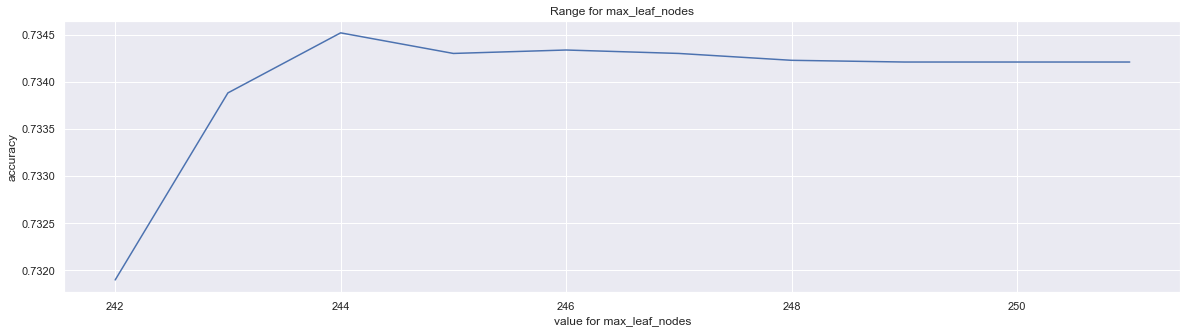

In [54]:
plt.figure(figsize=[20,5])
plt.plot(range(param_max_leaf_nodes-5 ,param_max_leaf_nodes+5),scoreboard_nodes)
plt.title('Range for max_leaf_nodes')
plt.xlabel('value for max_leaf_nodes')
plt.ylabel('accuracy')
plt.show()

In [55]:
print( 'Accuracy after adjust max_leaf_nodes:',max(scoreboard_nodes),'\nAccuracy gain after adjust max_leaf_nodes:',max(scoreboard_nodes) - accuracy_max_depth)
accuracy_max_leaf_nodes = max(scoreboard_nodes)

Accuracy after adjust max_leaf_nodes: 0.7345176537809253 
Accuracy gain after adjust max_leaf_nodes: 0.0005283659022258247


Final value for `max_leaf_nodes`  
* As the `max_leaf_node`set and decreasing the complexity of the model, the accuracy has increase.

* The next tuning hyper parameters are `min_samples_split` and `min_samples_leaf`, as these 2 hyper parameters are also decreasing the model's complexity, we will see if these 2 hyper paramters can decrease the variance of the model futher while increase or maintain the accuracy

#### Tuning for `min_samples_split`

In [56]:
#setting for min_samples_split
#plot learning curve for min_sample_split in RF

scoreboard_split=[]

for i in range(2,102,10):
    rfc = RandomForestClassifier(min_samples_split= i,max_leaf_nodes = param_max_leaf_nodes ,max_depth= param_max_depth, n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard_split.append(score)
    
param_min_samples_split = (scoreboard_split.index(max(scoreboard_split)))*10+2

In [57]:
print('highest accuracy:',max(scoreboard_split), 'at min_samples=',param_min_samples_split)

highest accuracy: 0.7349549483276121 at min_samples= 62


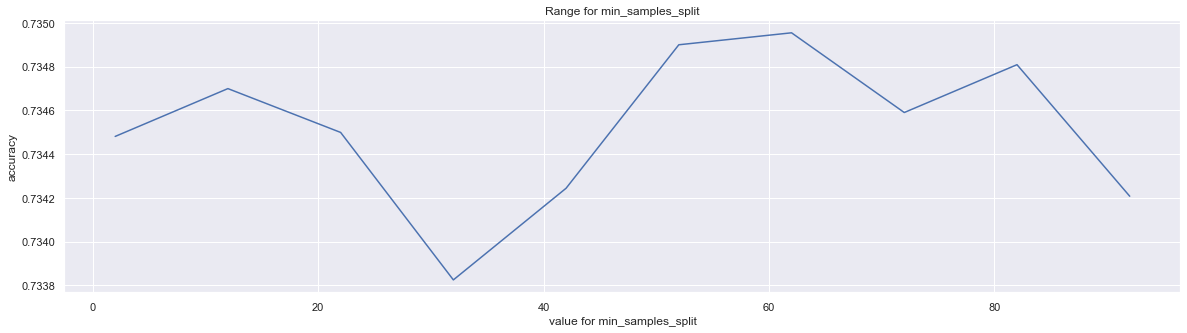

In [58]:
plt.figure(figsize=[20,5])
plt.plot(range(2,102,10),scoreboard_split)
plt.title('Range for min_samples_split')
plt.xlabel('value for min_samples_split')
plt.ylabel('accuracy')
plt.show()

In [59]:
print( 'Accuracy after adjust min_samples_split:',max(scoreboard_split),'\nAccuracy gain after adjust min_samples_split:',max(scoreboard_split) - accuracy_max_leaf_nodes)

Accuracy after adjust min_samples_split: 0.7349549483276121 
Accuracy gain after adjust min_samples_split: 0.0004372945466868394


In [60]:
param_min_samples_split

62

#### Fine tune for `min_samples_split`

In [61]:
#setting for min_samples_split
#plot learning curve for min_sample_split in RF

scoreboard_split2=[]

for i in range(param_min_samples_split-3,param_min_samples_split+3):
    rfc = RandomForestClassifier(min_samples_split= i,max_leaf_nodes = param_max_leaf_nodes ,max_depth= param_max_depth, n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard_split2.append(score)
    
param_min_samples_split = scoreboard_split2.index(max(scoreboard_split2))+ (param_min_samples_split-3)

In [62]:
print('highest accuracy:',max(scoreboard_split2), 'at min_samples=',param_min_samples_split)

highest accuracy: 0.7350642346181895 at min_samples= 59


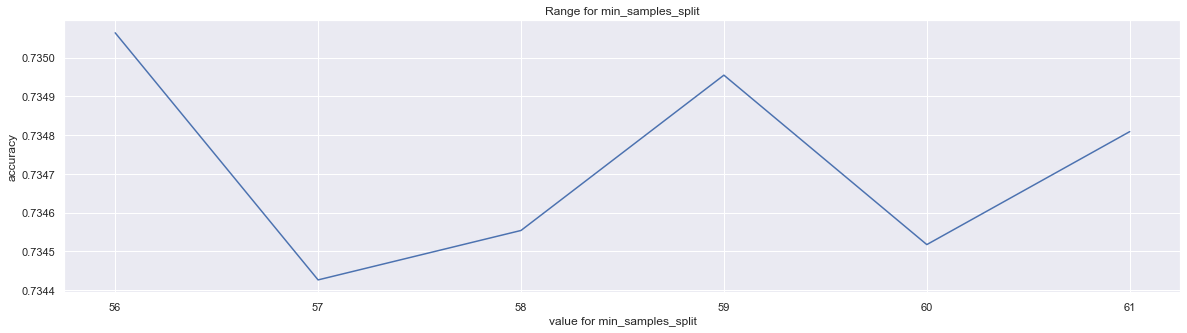

In [63]:
plt.figure(figsize=[20,5])
plt.plot(range(param_min_samples_split-3,param_min_samples_split+3),scoreboard_split2)
plt.title('Range for min_samples_split')
plt.xlabel('value for min_samples_split')
plt.ylabel('accuracy')
plt.show()

In [64]:
print( 'Accuracy after adjust min_samples_split:',max(scoreboard_split2),'\nAccuracy gain after adjust min_samples_split:',max(scoreboard_split2) - accuracy_max_leaf_nodes)
accuracy_min_samples_split=max(scoreboard_split2)

Accuracy after adjust min_samples_split: 0.7350642346181895 
Accuracy gain after adjust min_samples_split: 0.0005465808372642211


Final `min_samples_split`  changed to **63**

#### Tuning for 'min_samples_leaf'

In [65]:
#setting for min_samples_leaf
#plot learning curve for min_samples_leaf in RF

scoreboard_leaf=[]

for i in range(1,100,10):
    rfc = RandomForestClassifier(min_samples_leaf=i ,min_samples_split= param_min_samples_split ,max_leaf_nodes = param_max_leaf_nodes ,max_depth= param_max_depth, n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
    score= cross_val_score(rfc, X_train, y_train.values.flatten(), cv=10).mean()
    scoreboard_leaf.append(score)
    
param_min_samples_leaf = (scoreboard_leaf.index(max(scoreboard_leaf)))*10+1

In [66]:
print('highest accuracy:',max(scoreboard_leaf), 'at min_samples_leaf=', param_min_samples_leaf)

highest accuracy: 0.7350642346181895 at min_samples_leaf= 1


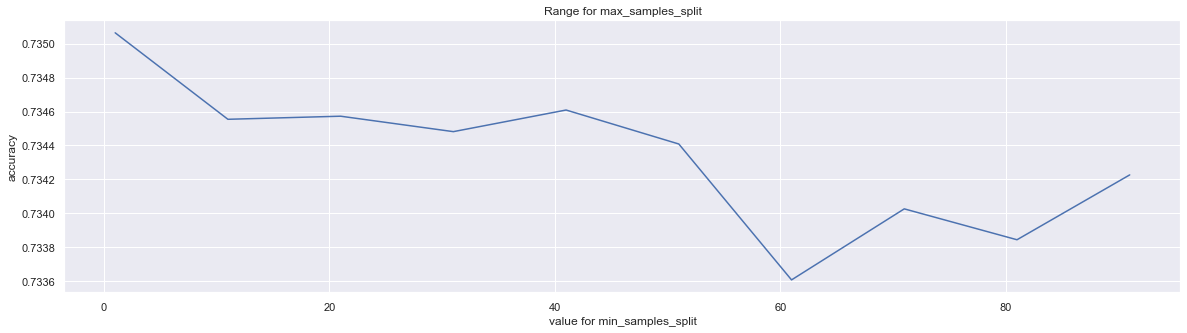

In [67]:
plt.figure(figsize=[20,5])
plt.plot(range(1,100,10),scoreboard_leaf)
plt.title('Range for max_samples_split')
plt.xlabel('value for min_samples_split')
plt.ylabel('accuracy')
plt.show()

In [68]:
print( 'Accuracy after adjust min_samples_leaf:',max(scoreboard_leaf),'\nAccuracy gain after adjust min_samples_leaf:',max(scoreboard_leaf) - accuracy_min_samples_split)

Accuracy after adjust min_samples_leaf: 0.7350642346181895 
Accuracy gain after adjust min_samples_leaf: 0.0


#### Fine tune `min_samples_leaf`

In [69]:
# A dictionary contains hyper-parameters for best for the RF model
param_grid = {
    'min_samples_leaf': np.arange(1,param_min_samples_leaf+1)
}

rfc = RandomForestClassifier(min_samples_split= param_min_samples_split ,max_leaf_nodes = param_max_leaf_nodes ,max_depth= param_max_depth, n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
GSearch = GridSearchCV(rfc, param_grid, cv=10)
GSearch.fit(X_train, y_train.values.flatten())


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, max_leaf_nodes=247,
                                              min_samples_split=59,
                                              n_estimators=254, n_jobs=-1,
                                              random_state=50),
             param_grid={'min_samples_leaf': array([1])})

In [70]:
GSearch.best_params_

{'min_samples_leaf': 1}

In [71]:
accuracy_min_samples_leaf = GSearch.best_score_
param_min_samples_leaf = GSearch.best_params_.get('min_samples_leaf')
print('max: ',accuracy_min_samples_leaf,'at ',param_min_samples_leaf)

max:  0.7350642346181895 at  1


In [72]:
print('Accuracy after tuning max_features:',accuracy_min_samples_leaf, 'Accuracy increase after tuning max_features:',accuracy_min_samples_leaf - accuracy_min_samples_split)

Accuracy after tuning max_features: 0.7350642346181895 Accuracy increase after tuning max_features: 0.0


Hence, we confirm that the `min_samples_leaf` is remain **default** as 1

#### Tuning `max_features` and `criterion`
* Final 2 hyper parameters to tune.

* These 2 are nature to the complexity of the model, might either increase or decrease the complexity.

* Hence, lets see how these 2 hyper parameters will going to affect the accuracy

In [73]:
# A dictionary contains hyper-parameters for best max_depth and n_estimators for the RF model
param_grid = {
    'criterion': ['gini','entropy'],
    'max_features': np.arange(1,10)
}

rfc= RandomForestClassifier(min_samples_leaf=param_min_samples_leaf ,min_samples_split= param_min_samples_split ,max_leaf_nodes = param_max_leaf_nodes ,max_depth= param_max_depth, n_estimators= param_n_estimators, n_jobs=-1,random_state=50)
GSearch = GridSearchCV(rfc, param_grid, cv=10)
GSearch.fit(X_train, y_train.values.flatten())


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(max_depth=10, max_leaf_nodes=247,
                                              min_samples_split=59,
                                              n_estimators=254, n_jobs=-1,
                                              random_state=50),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [74]:
GSearch.best_params_

{'criterion': 'gini', 'max_features': 5}

In [75]:
accuracyoflast= GSearch.best_score_

param_criterion = GSearch.best_params_.get('criterion')
param_max_features = GSearch.best_params_.get('max_features')

print('max: ',accuracyoflast,'using',param_criterion ,'with max_features',param_max_features)

max:  0.7351735673839064 using gini with max_features 5


In [76]:
print('Accuracy after tuning max_features:',GSearch.best_score_, 'Accuracy increase after tuning max_features:',accuracyoflast- accuracy_min_samples_leaf)

Accuracy after tuning max_features: 0.7351735673839064 Accuracy increase after tuning max_features: 0.00010933276571689632


#### Final values for `max_features` and `criterion` remain as default setting as there is no gain in accuracy

### Final hyper parameter values for the model

In [78]:
print('The finale tuned values for the hyper parameters in random forest:',
     '\nn_estimators:',param_n_estimators,
     '\nmax_depth:',param_max_depth,
      '\nmax_leaf_nodes:',param_max_leaf_nodes,
     '\nmin_samples_split:', param_min_samples_split,
     '\nmin_samples_leaf:',param_min_samples_leaf,
     '\nmax_features:',param_max_features)

The finale tuned values for the hyper parameters in random forest: 
n_estimators: 254 
max_depth: 10 
max_leaf_nodes: 247 
min_samples_split: 59 
min_samples_leaf: 1 
max_features: 5


#### Hyper parameters confirmed in random forest model: 

* n_estimators: 254 

* max_depth: 10 

* max_leaf_nodes: 247 

* min_samples_split: 59 

* min_samples_leaf: 1 

* max_features: 5

The rest of the hyper parameters will remain as default

In [97]:
param_n_estimators= 254 
param_max_depth= 10 
param_max_leaf_nodes= 247 
param_min_samples_split= 59 
param_min_samples_leaf= 1 
param_max_features= 5

___
### Test accuracy on test dataset

In [98]:
#create the final random forest model 
final_rfc = RandomForestClassifier(n_estimators= param_n_estimators,
                                   max_depth=param_max_depth,
                                   max_leaf_nodes= param_max_leaf_nodes,
                                   min_samples_split= param_min_samples_split,
                                   min_samples_leaf= param_min_samples_leaf,
                                   max_features= param_max_features,
                                   random_state=50,
                                   n_jobs=-1)

In [100]:
final_rfc

RandomForestClassifier(max_depth=10, max_features=5, max_leaf_nodes=247,
                       min_samples_split=59, n_estimators=254, n_jobs=-1,
                       random_state=50)

#### Visualise trees in the random forest

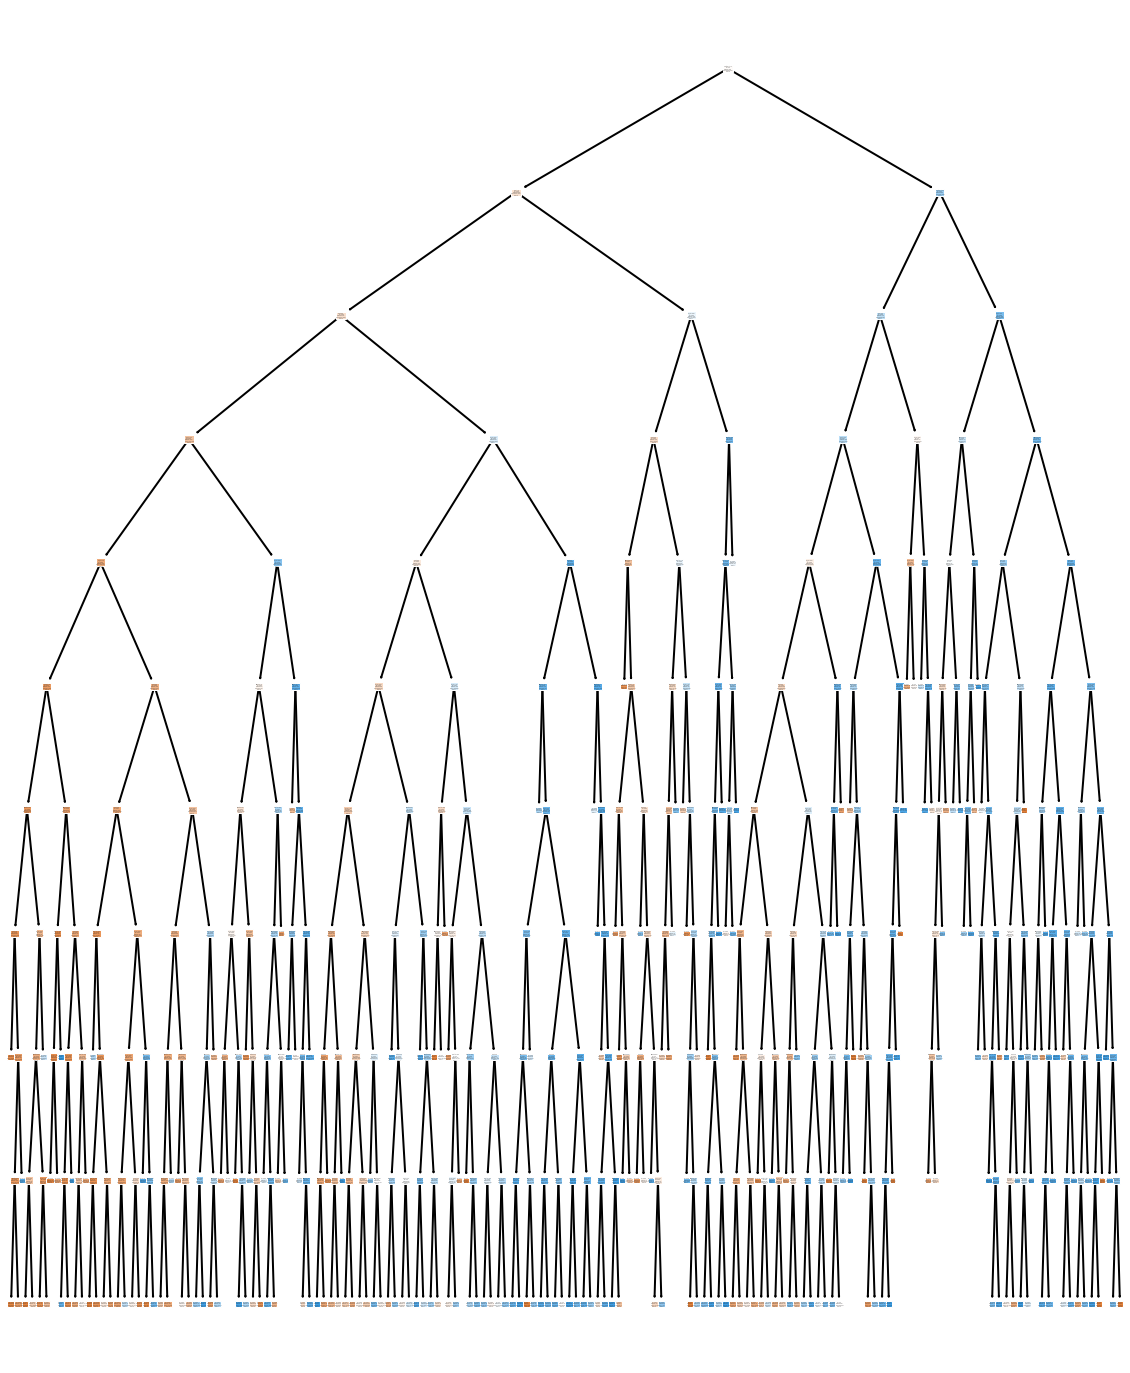

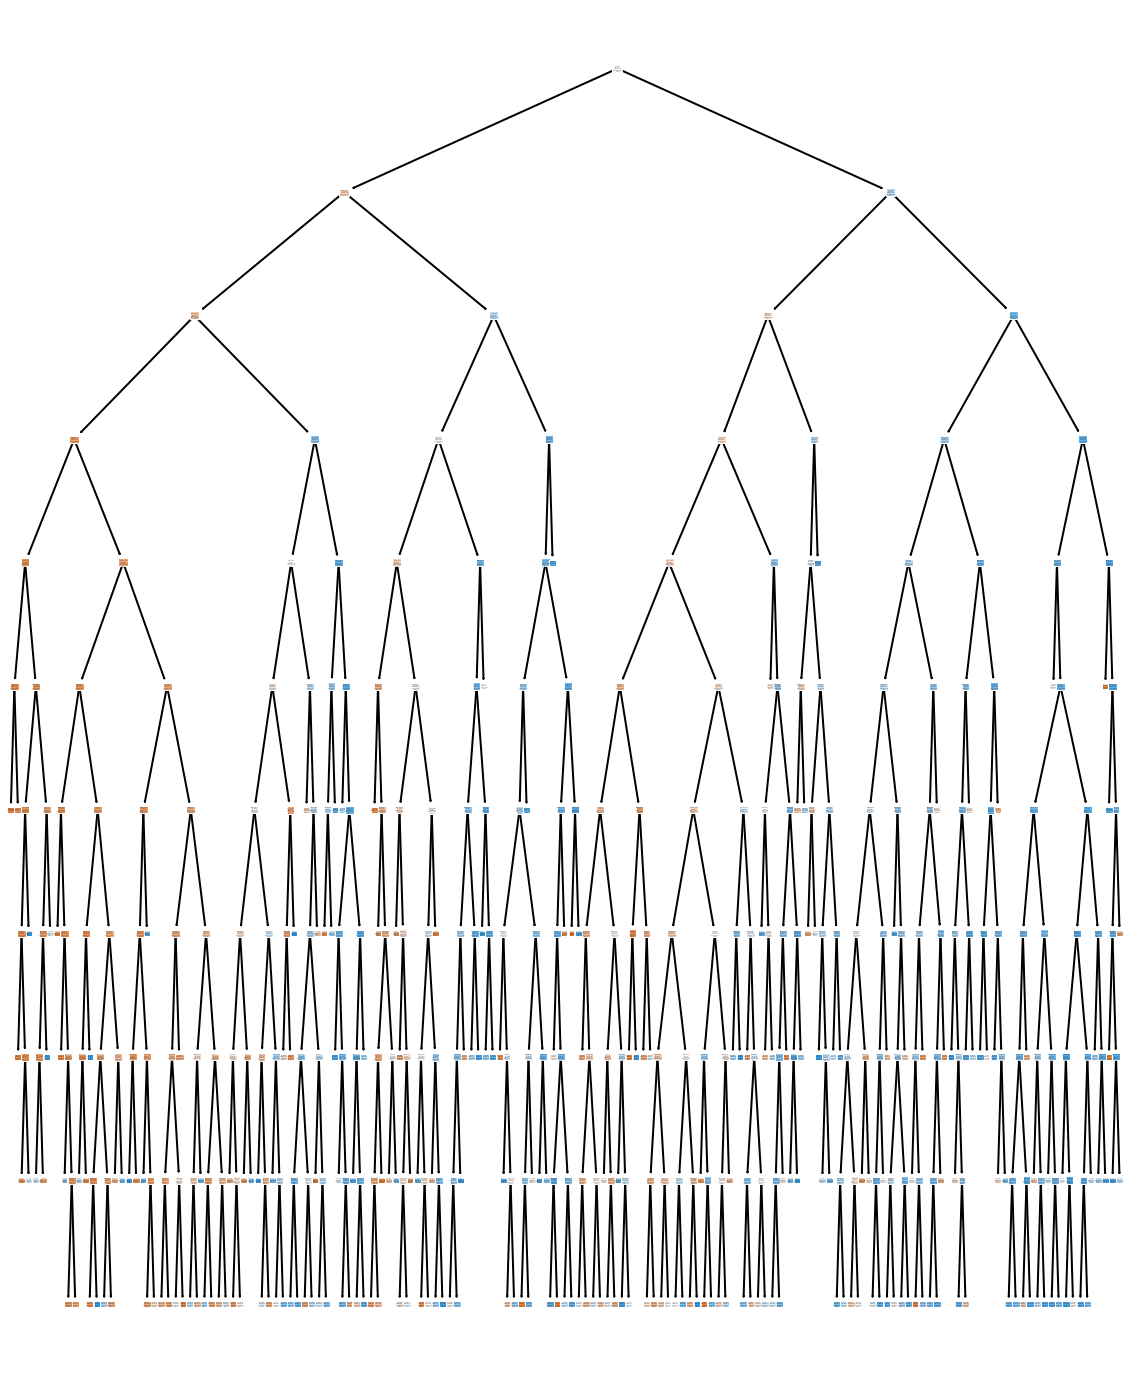

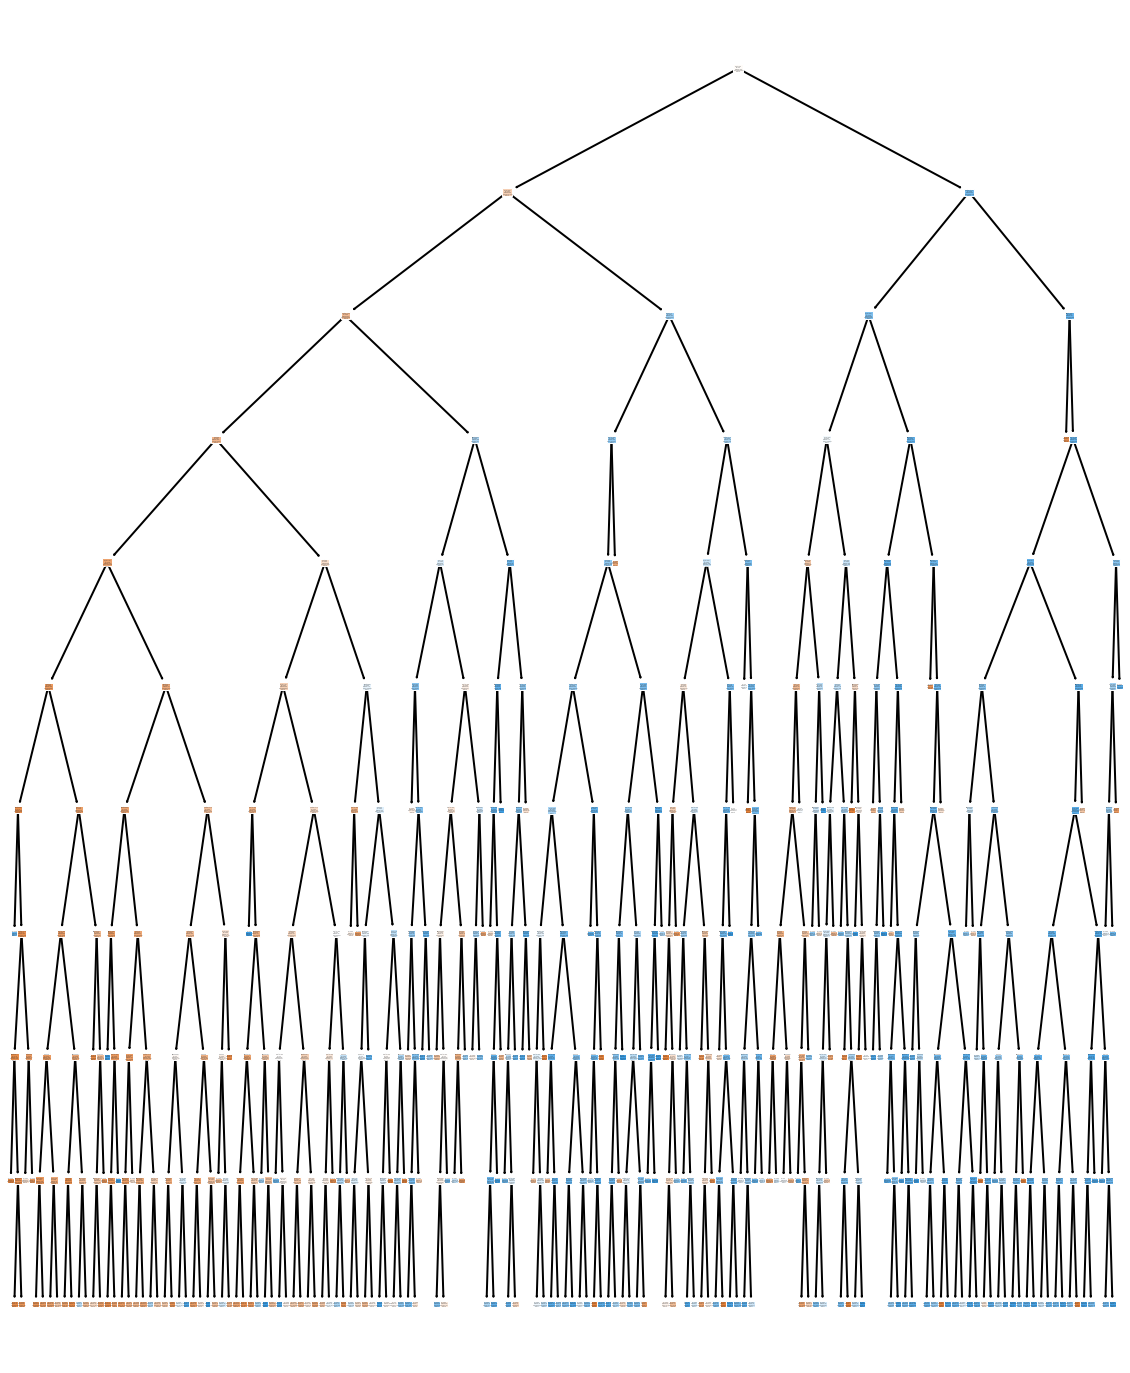

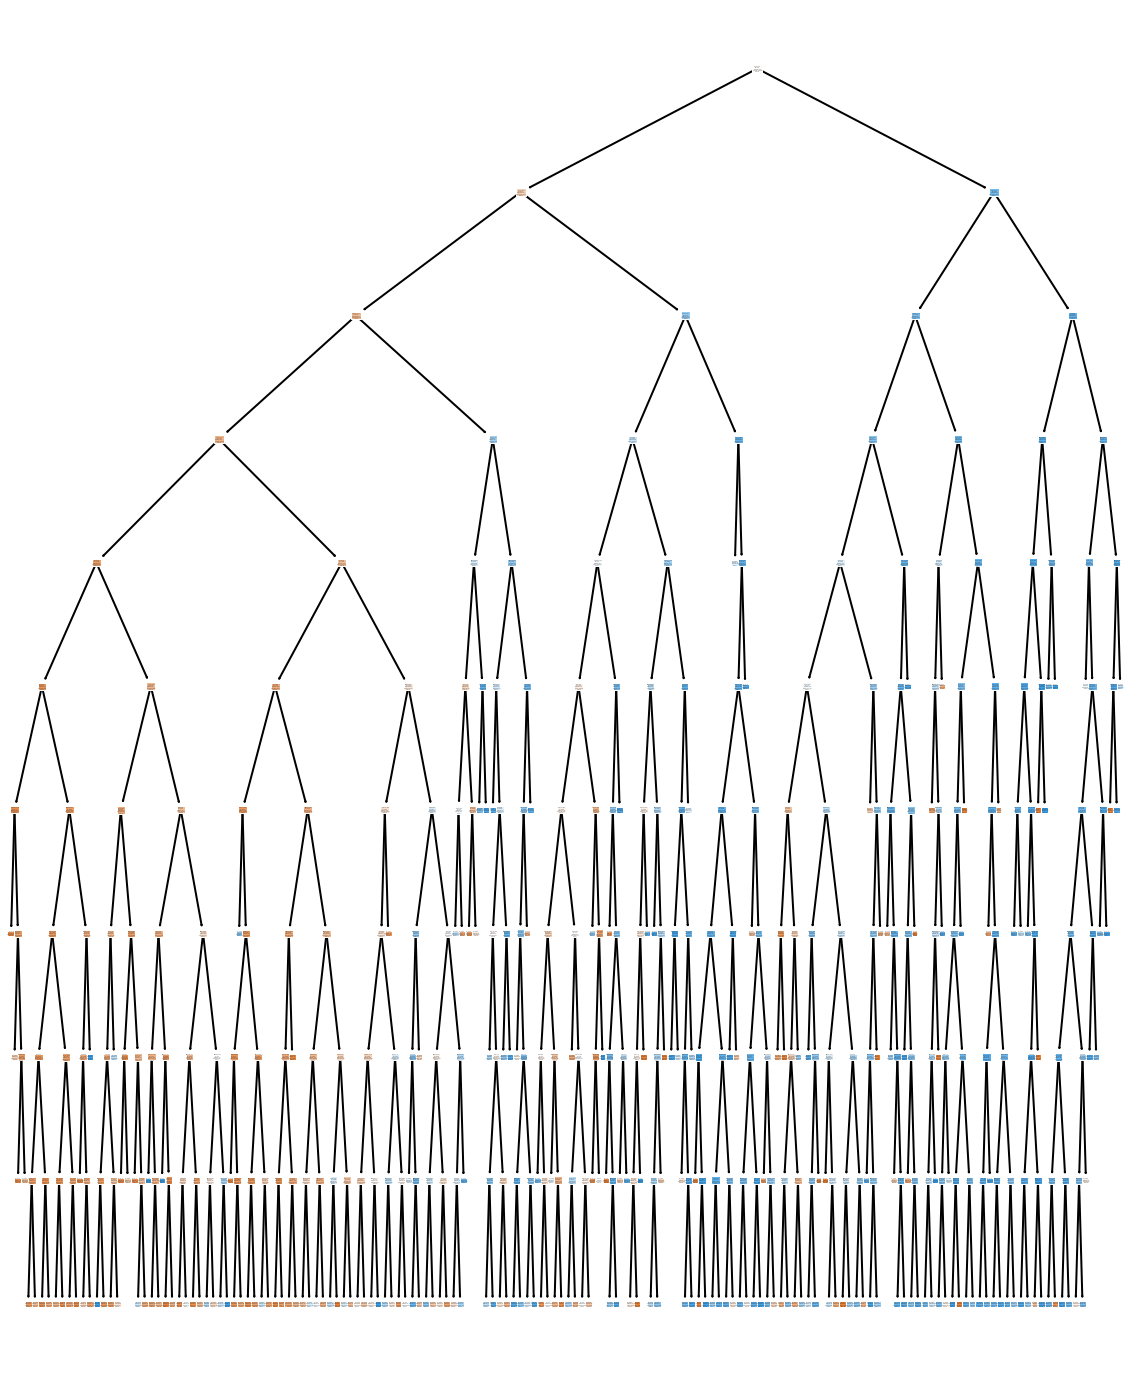

In [196]:
# Get the first 4 Trees in the random forest
from sklearn.tree import plot_tree
trees=[]
for i in range(4):
    fig, ax = plt.subplots(figsize=(20, 25))
    tree = plot_tree(final_rfc[i], feature_names = X_test.columns, class_names = [str(x) for x in dectree.classes_], filled=True)

    for t in tree:
        arrow = t.arrow_patch
        if arrow is not None:
            arrow.set_edgecolor('black')
            arrow.set_linewidth(2)
            
    trees.append(tree)

#### Calculate the accuracy, precision, recall and f1 of the train and test 

In [206]:
#Train set
accuracy_train= cross_val_score(final_rfc, X_train, y_train.values.flatten() ,scoring='accuracy', cv=10).mean()
precision_train= cross_val_score(final_rfc, X_train, y_train.values.flatten() ,scoring='precision', cv=10).mean()
recall_train= cross_val_score(final_rfc, X_train, y_train.values.flatten() ,scoring='recall', cv=10).mean()
f1_train= cross_val_score(final_rfc, X_train, y_train.values.flatten() ,scoring='f1', cv=10).mean()

#Test set
accuracy_test= cross_val_score(final_rfc, X_test, y_test.values.flatten() ,scoring='accuracy', cv=10).mean()
precision_test= cross_val_score(final_rfc, X_test, y_test.values.flatten() ,scoring='precision', cv=10).mean()
recall_test= cross_val_score(final_rfc, X_test, y_test.values.flatten() ,scoring='recall', cv=10).mean()
f1_test= cross_val_score(final_rfc, X_test, y_test.values.flatten() ,scoring='f1', cv=10).mean()

In [208]:
print('RandomForest:\n')
print('Train set:')
print('Accuracy:',accuracy_train)
print('Precision:',precision_train)
print('Recall:',recall_train)
print('F1:',f1_train)

print('\nTest set:')
print('Accuracy:',accuracy_test)
print('Precision:',precision_test)
print('Recall:',recall_test)
print('F1:',f1_test)

RandomForest:

Train set:
Accuracy: 0.7351735673839064
Precision: 0.7565990436047311
Recall: 0.6834234933711464
F1: 0.7181034392318556

Test set:
Accuracy: 0.7299215503494083
Precision: 0.7494490792411497
Recall: 0.6873627647561431
F1: 0.7169727688186015


In [103]:
final_rfc.fit(X_train, y_train.values.flatten())
y_train_pred=final_rfc.predict(X_train)
y_test_pred=final_rfc.predict(X_test)

<AxesSubplot:>

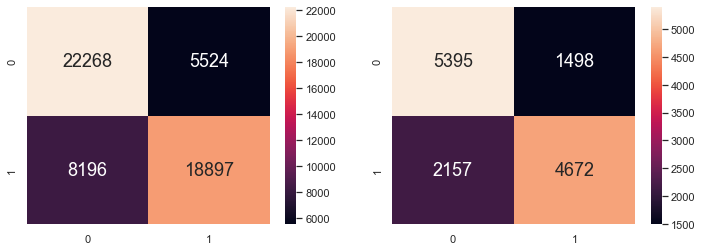

In [104]:
# Plot the Confusion Matrix for Train and Test data
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train,y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test,y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])


In [128]:
#create funciton for computing variance, loss and bias of the model

def _draw_bootstrap_sample(rng, X, y):
    sample_indices = np.arange(X.shape[0])
    bootstrap_indices = rng.choice(
        sample_indices, size=sample_indices.shape[0], replace=True
    )
    return X[bootstrap_indices], y[bootstrap_indices]


def bias_variance_decomp(
    estimator,
    X_train,
    y_train,
    X_test,
    y_test,
    loss="0-1_loss",
    num_rounds=200,
    random_seed=None,
    **fit_params
):

    
    loss_list=[] 
    bias_list=[]
    var_list=[]
    
    # types of loss functions used 
    supported = ["0-1_loss", "mse"]
    if loss not in supported:
        raise NotImplementedError("loss must be one of the following: %s" % supported)

    for ary in (X_train, y_train, X_test, y_test):
        if hasattr(ary, "loc"):
            raise ValueError(
                "The bias_variance_decomp does not "
                "support pandas DataFrames yet. "
                "Please check the inputs to "
                "X_train, y_train, X_test, y_test. "
                "If e.g., X_train is a pandas "
                "DataFrame, try passing it as NumPy array via "
                "X_train=X_train.values."
            )

    rng = np.random.RandomState(random_seed)

    if loss == "0-1_loss":
        dtype = np.int64
    elif loss == "mse":
        dtype = np.float64

    all_pred = np.zeros((num_rounds, y_test.shape[0]), dtype=dtype)

    for i in range(num_rounds):
        X_boot, y_boot = _draw_bootstrap_sample(rng, X_train, y_train)

        # Keras support
        if estimator.__class__.__name__ in ["Sequential", "Functional"]:

            # reset model
            for ix, layer in enumerate(estimator.layers):
                if hasattr(estimator.layers[ix], "kernel_initializer") and hasattr(
                    estimator.layers[ix], "bias_initializer"
                ):
                    weight_initializer = estimator.layers[ix].kernel_initializer
                    bias_initializer = estimator.layers[ix].bias_initializer

                    old_weights, old_biases = estimator.layers[ix].get_weights()

                    estimator.layers[ix].set_weights(
                        [
                            weight_initializer(shape=old_weights.shape),
                            bias_initializer(shape=len(old_biases)),
                        ]
                    )

            estimator.fit(X_boot, y_boot, **fit_params)
            pred = estimator.predict(X_test).reshape(1, -1)
        else:
            pred = estimator.fit(X_boot, y_boot, **fit_params).predict(X_test)
        all_pred[i] = pred

    if loss == "0-1_loss":
        main_predictions = np.apply_along_axis(
            lambda x: np.argmax(np.bincount(x)), axis=0, arr=all_pred
        )

        avg_expected_loss = np.apply_along_axis(
            lambda x: (x != y_test).mean(), axis=1, arr=all_pred
        ).mean()

        avg_bias = np.sum(main_predictions != y_test) / y_test.size
        var = np.zeros(pred.shape)

        for pred in all_pred:
            var += (pred != main_predictions).astype(np.int64)

        var /= num_rounds
        
        avg_var = var.sum() / y_test.shape[0]

    else:    #for mse loss function
        avg_expected_loss = np.apply_along_axis(
            lambda x: ((x - y_test) ** 2).mean(), axis=1, arr=all_pred
        ).mean()

        main_predictions = np.mean(all_pred, axis=0)

        avg_bias = np.sum((main_predictions - y_test) ** 2) / y_test.size
        
        avg_var = np.sum((main_predictions - all_pred) ** 2) / all_pred.size


    return avg_expected_loss, avg_bias, avg_var

#### Calculate average expected loss, average bias and average variance of the random forest model trained

In [129]:
#Gat bias, variance and loss of the model

avg_expected_loss, avg_bias, avg_va= bias_variance_decomp(
        final_rfc,X_train.values, y_train.values.flatten() , X_test.values,y_test.values.flatten(), 
        loss='0-1_loss',
        random_seed=50)

print('Average expected loss: %.3f' % avg_expected_loss)
print('Average bias: %.3f' % avg_bias)
print('Average variance: %.3f' % avg_var)

Average expected loss: 0.269
Average bias: 0.267
Average variance: 0.029


___

## Conclusion

* Both Decision Tree and Random Forest models have accuracy around 72%. 

* The model has already been tune to ites limit with good hyper parameters, but the accuracy value still consider quite low. 

* This might implies that the dataset has too much noise, which is affecting the accuracy.

___